# Analysis of Crime in Los Angeles

In [1]:
#  Importing all necessary libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## DATA DESCRIPTION

The dataset encompasses incidents of crime in the City of Los Angeles spanning from 2010 to 2023, with a focused analysis on the period from 2019 to 2022. The information includes victim demographics, crime occurrence details, and geographic data, offering a comprehensive view of the city's crime landscape. Our primary objective is to meticulously discern and comprehend patterns that illuminate the most targeted victims and areas across various crime types.

### Data Dictionary

#### Column Name: Description of Column

**DR_NO**: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits \
**Date Rptd**: Reported date of Crime: MM/DD/YYYY \
**DATE OCC**: Occured date of Crime: MM/DD/YYYY \
**TIME OCC**: Time of Crime: In 24 hour military time. \
**AREA**: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. \
**AREA NAME**: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. \
**Rpt Dist No**: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. \
**Crm Cd**: Indicates the crime committed. \
**Crm Cd Desc**: Defines the Crime Code provided. \
**Mocodes**: Modus Operandi: Activities associated with the suspect in commission of the crime \
**Vict Age**: Age of Victim \
**Vict Sex**: Sex of Victim: F - Female M - Male X - Unknown \
**Vict Descent**: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian \
**Premis Cd**: The type of structure, vehicle, or location where the crime took place. \
**Premis Desc**: Defines the Premise Code provided. \
**Weapon Used Cd**: The type of weapon used in the crime \
**Weapon Desc**: Defines the Weapon Used Code provided. \
**Status**: Status of the case. (IC is the default) \
**Status Desc**: Defines the Status Code provided. \
**Crm Cd 1**: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. \
**Crm Cd 2**: May contain a code for an additional crime, less serious than Crime Code 1. \
**Crm Cd 3**: May contain a code for an additional crime, less serious than Crime Code 1. \
**Crm Cd 4**: May contain a code for an additional crime, less serious than Crime Code 1. \
**LOCATION**: Street address of crime incident rounded to the nearest hundred block to maintain anonymity. \
**Cross Street**: Cross Street of rounded Address \
**LAT**: Latitude \
**LON**: Longtitude

### Data Import

In [2]:
# Reading the .csv file with Crime data for LA from 2019-2023
df  = pd.read_csv('Crime_Data.csv')
# Reading the .csv file with Crime data for LA from 2010-2018
df_old = pd.read_csv("Crime_Data_from_2010_to_2019.csv")

In [3]:
df.head()
df_old.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


## Data Preparation

### Data Cleaning


In [4]:
df.columns == df_old.columns

# Area column from old dataset had space so removing the space and merging datasets
df.columns[4]
df_old.columns[4]

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

'AREA'

'AREA '

In [5]:
# Renaming the columns of old data to merge both dataframes
df_old.columns = df.columns

# Appending new data to old data (pre 2020 data to till date data)
data = pd.concat([df_old, df])
df.shape
df_old.shape
data.shape

(825212, 28)

(2135487, 28)

(2960699, 28)

In [6]:
# Converting Crime occured and reporting date to Day, Month, Year and quarter columns
data['OCC Day'] = pd.to_datetime(data['DATE OCC']).dt.day
data['OCC Month'] = pd.to_datetime(data['DATE OCC']).dt.month
data['OCC Year'] = pd.to_datetime(data['DATE OCC']).dt.year
data['OCC DOW'] = pd.to_datetime(data['DATE OCC']).dt.day_name()
data['Rptd Day'] = pd.to_datetime(data['Date Rptd']).dt.day
data['Rptd Month'] = pd.to_datetime(data['Date Rptd']).dt.month
data['Rptd Year'] = pd.to_datetime(data['Date Rptd']).dt.year
data['Rptd DOW'] = pd.to_datetime(data['Date Rptd']).dt.day_name()
data['OCC hr'] =  data['TIME OCC'].apply(lambda x : int(x/100))
data["OCC quarter"] = "Q" + pd.to_datetime(data['DATE OCC']).dt.quarter.astype(str) + "'" + (data["OCC Year"]%2000).astype(str)

In [7]:
# Filtering for 2019 till date
data = data[data["OCC Year"] >= 2019]
data["OCC Year"].value_counts().sort_index()

2019    218699
2020    199417
2021    280201
2022    234264
2023    182164
Name: OCC Year, dtype: int64

In [8]:
# Removing 2023 from the data as we do not have data for entire year
data = data[data["OCC Year"] != 2023]
data["OCC Year"].value_counts().sort_index()

2019    218699
2020    199417
2021    280201
2022    234264
Name: OCC Year, dtype: int64

### Data quality check

In [9]:
#Checking occurances of null values
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           120555
Vict Age               0
Vict Sex          113690
Vict Descent      113696
Premis Cd             14
Premis Desc          424
Weapon Used Cd    607436
Weapon Desc       607436
Status                 1
Status Desc            0
Crm Cd 1               9
Crm Cd 2          862217
Crm Cd 3          930223
Crm Cd 4          932513
LOCATION               0
Cross Street      776933
LAT                    0
LON                    0
OCC Day                0
OCC Month              0
OCC Year               0
OCC DOW                0
Rptd Day               0
Rptd Month             0
Rptd Year              0
Rptd DOW               0
OCC hr                 0
OCC quarter            0
dtype: int64

In [10]:
# Checking value counts of Victim sex to replace values
data['Vict Sex'].value_counts()

# Creating a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data.copy()

# Replacing -, N, H to X where X is unknown 
data_copy['Vict Sex'].replace({'-': 'X', 'H': 'X', np.nan: 'X', 'N': 'X'}, inplace=True)

# Displaying the updated value counts
data_copy['Vict Sex'].value_counts()

data = data_copy

M    394970
F    352493
X     71339
H        88
N         1
Name: Vict Sex, dtype: int64

M    394970
F    352493
X    185118
Name: Vict Sex, dtype: int64

In [11]:
# Checking value counts of Victim descent to replace values
data['Vict Descent'].value_counts()

# Creating a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data.copy()

# Replacing - to X where X is unknown
data_copy['Vict Descent'].replace({'-':'X'}, inplace = True)

# Displaying the updated value counts
data_copy['Vict Descent'].value_counts()

data = data_copy

H    293485
W    196597
B    134900
X     80626
O     77320
A     21290
K      4913
F      3379
C      2759
J      1057
I       809
V       762
Z       408
P       221
U       155
G        59
D        51
L        49
S        44
-         1
Name: Vict Descent, dtype: int64

H    293485
W    196597
B    134900
X     80627
O     77320
A     21290
K      4913
F      3379
C      2759
J      1057
I       809
V       762
Z       408
P       221
U       155
G        59
D        51
L        49
S        44
Name: Vict Descent, dtype: int64

In [12]:
# Grouping all victims except hispanic, white, black and unknown into one category - others
data['Vict Descent 1'] = np.where(data['Vict Descent'].isin(["H", "B", "W", "X"]), data['Vict Descent'], "Others")

# Displaying the updated value counts
data['Vict Descent 1'].value_counts()

H         293485
Others    226972
W         196597
B         134900
X          80627
Name: Vict Descent 1, dtype: int64

### Data Processing

In [13]:
# checking different Crime types and counts to identify broad crime groups
data["Crm Cd Desc"].value_counts()
data["Crm Cd Desc"].nunique()

VEHICLE - STOLEN                                           92732
BATTERY - SIMPLE ASSAULT                                   74448
BURGLARY FROM VEHICLE                                      61270
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    56756
THEFT OF IDENTITY                                          56649
                                                           ...  
DISHONEST EMPLOYEE ATTEMPTED THEFT                             3
INCITING A RIOT                                                2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)        1
TILL TAP - ATTEMPT                                             1
ABORTION/ILLEGAL                                               1
Name: Crm Cd Desc, Length: 141, dtype: int64

141

In [14]:
# Grouped different crimes in 7 different crime groups - Theft, Assault, Felony, Sexual, Serious, Child Abuse. Misc
data["Crm Group"] = data["Crm Cd Desc"].apply(lambda x:
                                          "Theft" if "theft" in x.lower() else
                                          "Theft" if "stole" in x.lower() else
                                          "Theft" if "steal" in x.lower() else
                                          "Theft" if "burglary" in x.lower() else
                                          "Theft" if "robbery" in x.lower() else
                                          "Theft" if "shoplifting" in x.lower() else
                                          "Theft" if "snatch" in x.lower() else
                                          "Theft" if "pick" in x.lower() else
                                          
                                          "Sexual" if "sex" in x.lower() else
                                          "Sexual" if "porn" in x.lower() else
                                          "Sexual" if "rape" in x.lower() else
                                          "Sexual" if "intimate" in x.lower() else
                                          "Sexual" if "oral" in x.lower() else
                                          "Sexual" if "indecent" in x.lower() else
                                          "Sexual" if "peep" in x.lower() else
                                          "Sexual" if "lewd" in x.lower() else
                                          
                                          "Felony" if "felony" in x.lower() else
                                          "Felony" if "vandalism" in x.lower() else
                                          "Felony" if "trespassing" in x.lower() else
                                          "Felony" if "violation" in x.lower() else
                                          "Felony" if "calls" in x.lower() else
                                          "Felony" if "court" in x.lower() else
                                          "Felony" if "arson" in x.lower() else
                                          "Felony" if "disturb" in x.lower() else
                                          
                                          "Child Abuse" if "child" in x.lower() else
                                          "Child Abuse" if "chld" in x.lower() else
                                          
                                          "Assault" if "assault" in x.lower() else
                                          "Assault" if "battery" in x.lower() else
                                          "Assault" if "threat" in x.lower() else
                                          "Assault" if "weapon" in x.lower() else
                                          "Assault" if "throw" in x.lower() else
                                          "Assault" if "bomb" in x.lower() else
                                          "Assault" if "shots" in x.lower() else
                                          "Assault" if "firearms" in x.lower() else
                                          "Assault" if "extortion" in x.lower() else
                                        
                                          "Serious" if "homicide" in x.lower() else
                                          "Serious" if "kidnapping" in x.lower() else
                                          "Serious" if "trafficking" in x.lower() else
                                          
                                          "Misc")

In [15]:
# Converting continuous Age variable into categorical by creating buckets
data["Age buckets"]=pd.cut(x=data["Vict Age"],bins=[-3,2,12,19,39,59,120],labels = ['Unknown','Child','Teenager', 'Young Adult','Middle Aged Adult','Senior Adult'])

In [16]:
# Filtering 2022 data 
data_2022 = data[data["OCC Year"] == 2022]

# EXPLORATORY DATA ANALYSIS

## Times series Data Analysis - Finding 1

### Total crimes by quarter from 2019 to 2022

<Figure size 1500x600 with 0 Axes>

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Total Crimes')

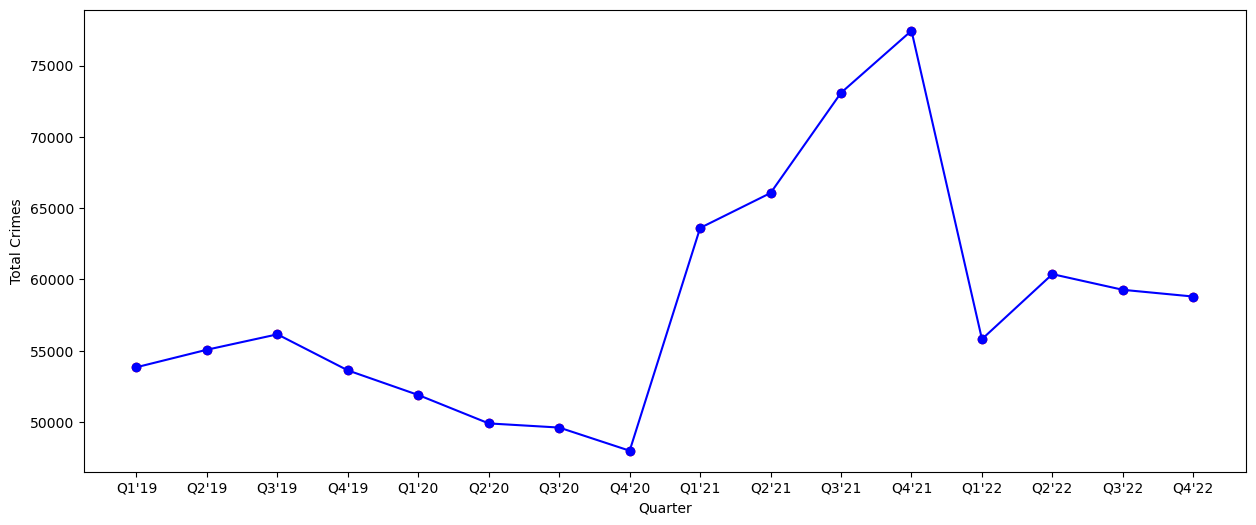

In [17]:
# Creating counts of crime for each quarter

date_counts = data.groupby(['OCC quarter', 'OCC Year']).size().reset_index(name='Counts').sort_values(['OCC Year', 'OCC quarter'])

# Plot a line connecting the points 
plt.figure(figsize=(15, 6))
plt.plot(date_counts['OCC quarter'], date_counts['Counts'], marker='o', color='blue', label='Line')

# Adding markers for each quarter
plt.scatter(date_counts['OCC quarter'], date_counts['Counts'], color='red', label='Count')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Turn off the grid
plt.grid(False)

# Set plot title and labels
#plt.title('Total Crimes by Time')
plt.xlabel('Quarter')
plt.ylabel('Total Crimes')

plt.show()


The observed decrease in total crimes in 2020 is likely a result of the COVID-19 pandemic, which led to lockdowns, impacting crime rates.

The observed significant increase in total crimes in 2021 after COVID-19 pandemic, which could be due to economic and mental health issues.

### Total crimes by day of the week

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total Crimes')

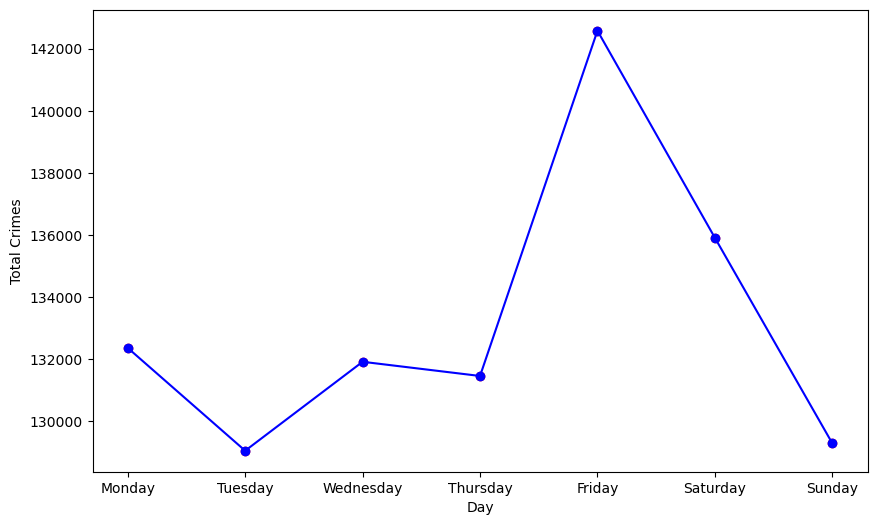

In [18]:
# Creating counts of crime by day of the week

day_counts = data.groupby('OCC DOW').size().reset_index(name='Counts')

# Specified the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'OCC DOW' to categorical type with the desired order
day_counts['OCC DOW'] = pd.Categorical(day_counts['OCC DOW'], categories=weekday_order, ordered=True)

# Sort the DataFrame by the day of the week
day_counts = day_counts.sort_values('OCC DOW')

# Plot a line connecting the points without grid
plt.figure(figsize=(10, 6))
plt.plot(day_counts['OCC DOW'], day_counts['Counts'], marker='o', color='blue', label='Line')

# Add markers for each date
plt.scatter(day_counts['OCC DOW'], day_counts['Counts'], color='red', label='Count')

# Turn off the grid
plt.grid(False)

# Set plot title and labels
#plt.title('Total Crimes by Day')
plt.xlabel('Day')
plt.ylabel('Total Crimes')

plt.show()


Observed high Crimes during the weekends on Friday and Saturday

### Total crimes by hour of the day

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Total Crimes')

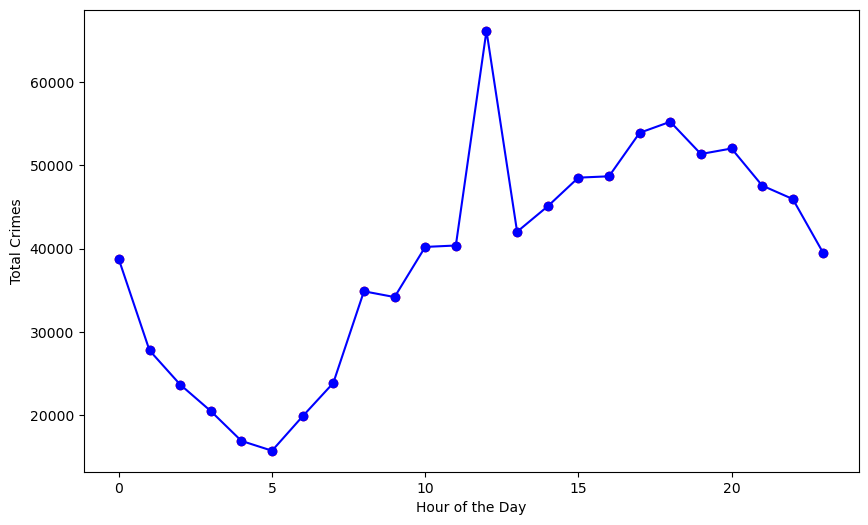

In [19]:
# Creating counts of crime by hour of the day

day_counts = data.groupby('OCC hr').size().reset_index(name='Counts')

# Sort the DataFrame by the hour of the day
day_counts = day_counts.sort_values('OCC hr')

# Plot a line connecting the points without grid
plt.figure(figsize=(10, 6))
plt.plot(day_counts['OCC hr'], day_counts['Counts'], marker='o', color='blue', label='Line')

# Add markers for each hour
plt.scatter(day_counts['OCC hr'], day_counts['Counts'], color='red', label='Count')

# Turn off the grid
plt.grid(False)

# Set plot labels
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')

plt.show()


Crime increases as the day progresses with spikes observed at 12 noon and heighten Crime level post 5 p.m. - 8 p.m. in the evening

### Crime occurences over time by Crime groups

In [20]:
dt = data.groupby(["Crm Group", "OCC Year"])["Crm Cd"].size().reset_index(name="Counts")
# Create a pivot table
pivot_table = dt.pivot_table(index='Crm Group', columns='OCC Year', values='Counts', aggfunc='sum', margins=True, margins_name='Total')
pivot_table

# Calculate the percentage increase from the previous year
percentage_increase_df = round(pivot_table.pct_change(axis=1) * 100)

# Drop the first column (NaN values for percentage increase from the previous year)
percentage_increase_df = percentage_increase_df.iloc[:, 1:]

percentage_increase_df.drop(["Total"], axis=1, inplace=True)

percentage_increase_df

OCC Year,2019,2020,2021,2022,Total
Crm Group,,,,,
Assault,41039,39016,52563,42952,175570
Child Abuse,2529,1961,2517,2004,9011
Felony,29482,28593,38077,27615,123767
Misc,3346,3062,3887,2996,13291
Serious,494,579,851,687,2611
Sexual,21742,19119,26764,19762,87387
Theft,120067,107087,155542,138248,520944
Total,218699,199417,280201,234264,932581


OCC Year,2020,2021,2022
Crm Group,,,
Assault,-5.0,35.0,-18.0
Child Abuse,-22.0,28.0,-20.0
Felony,-3.0,33.0,-27.0
Misc,-8.0,27.0,-23.0
Serious,17.0,47.0,-19.0
Sexual,-12.0,40.0,-26.0
Theft,-11.0,45.0,-11.0
Total,-9.0,41.0,-16.0


### Top four crime groups

In [21]:
# Counting total crimes occured in each crime type
crime_counts = data["Crm Group"].value_counts().to_frame().reset_index().rename(columns={'index': 'Crm Group', 'Crm Group':'count'})

# Selecting top 4 crime types occured
Top_4_crimes = list(crime_counts["Crm Group"].head(4))
crime_counts['norm count'] = crime_counts['count']
Top_4_crimes

['Theft', 'Assault', 'Felony', 'Sexual']

### How crimes varies for these top 4 crime groups across years

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Crm Group', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Counts of Crimes by Group and Year')

Text(0.5, 0, 'Crime Group')

Text(0, 0.5, 'Normalized Count')

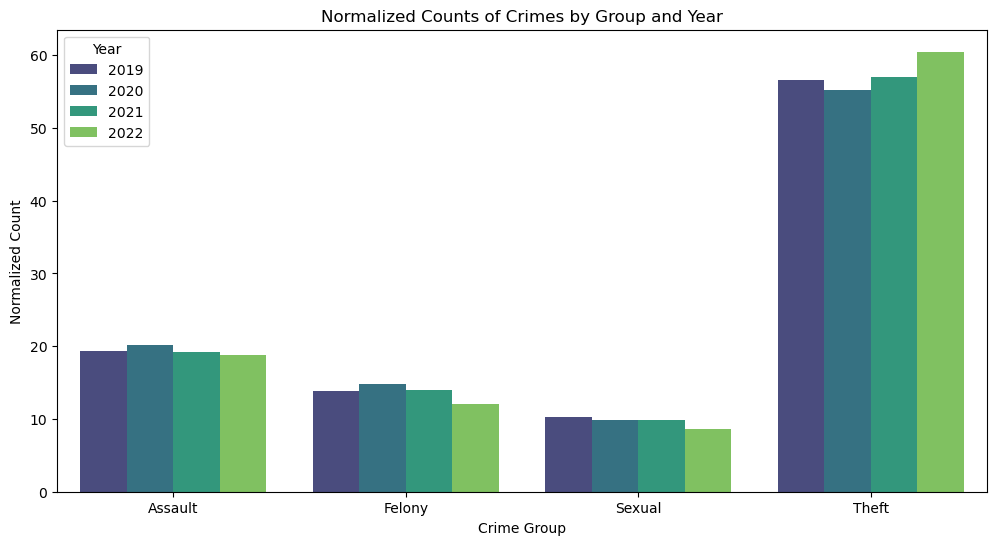

In [22]:
#Total Crimes per Year for top Crime Groups

data_top = data[data["Crm Group"].isin(Top_4_crimes)]

# Calculate normalized counts
normalized_counts = (data_top.groupby(["Crm Group", "OCC Year"]).size() / data_top.groupby("OCC Year").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Crm Group", y="Normalized Count", hue="OCC Year", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Counts of Crimes by Group and Year')
plt.xlabel('Crime Group')
plt.ylabel('Normalized Count')

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()


Post COVID, the proportion of Theft has increased while the proportion of Felony has decreased.

### Total increase in crimes from 2020 to 2021 by Crime groups

In [23]:
#Aggregating Crime types each year
data_year = data.groupby(["Crm Group", "Crm Cd Desc", "OCC Year"]).size().reset_index(name='Counts')

# Filtering data for 2020 and 2021 for crime incliners from 2020 to 2021
v1 = data_year[(data_year["OCC Year"]==2020) | (data_year["OCC Year"]==2021)]

# Calculating number of crimes increased from 2020 to 2021 
v2 = pd.merge(v1[v1["OCC Year"]==2021], v1[v1["OCC Year"]==2020].drop("OCC Year", axis=1),  how='left', left_on=["Crm Group", "Crm Cd Desc"], right_on = ["Crm Group", "Crm Cd Desc"])
v2 = v2[v2["Counts_y"].notna()]
v2["Count_change"] = v2["Counts_x"] - v2["Counts_y"]
#v2["Perc_change"] = round((v2["Counts_x"] - v2["Counts_y"])/v2["Counts_y"] * 100, 2)
v2.sort_values("Count_change", ascending = False, inplace = True)
v3 = v2.groupby(["Crm Group"]).head(5)
v3[v3["Crm Group"] == "Theft"]

,Crm Group,Crm Cd Desc,OCC Year,Counts_x,Counts_y,Count_change
131,Theft,VEHICLE - STOLEN,2021,31886,20768.0,11118.0
122,Theft,THEFT OF IDENTITY,2021,16473,8776.0,7697.0
119,Theft,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,2021,10091,4783.0,5308.0
97,Theft,BURGLARY FROM VEHICLE,2021,17680,12709.0,4971.0
124,Theft,THEFT PLAIN - PETTY ($950 & UNDER),2021,14782,10842.0,3940.0


### Proportion of Incliners from 2020 to 2021 for all Crime Groups

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x32b984dd0>,
 [Text(1.0998987933558604, 0.01492127254366648, 'Serious'),
  Text(1.0983541783588182, 0.06015063492371161, 'Child Abuse'),
  Text(1.0928963830812497, 0.12480983874648083, 'Misc'),
  Text(0.9647786753518853, 0.5283957868740645, 'Sexual'),
  Text(0.3138442649999465, 1.054277846360552, 'Felony'),
  Text(-0.770696102844002, 0.7848742046092914, 'Assault'),
  Text(-0.08426366928596775, -1.0967678122731652, 'Theft')],
 [Text(0.5999447963759238, 0.008138875932908988, '0.4%'),
  Text(0.5991022791048098, 0.032809437231115415, '0.9%'),
  Text(0.5961252998624997, 0.0680780938617168, '1.0%'),
  Text(0.526242913828301, 0.2882158837494897, '11.3%'),
  Text(0.17118778090906173, 0.5750606434693919, '13.5%'),
  Text(-0.4203796924603647, 0.42811320251415885, '20.4%'),
  Text(-0.04596200142870968, -0.5982369885126355, '52.4%')])

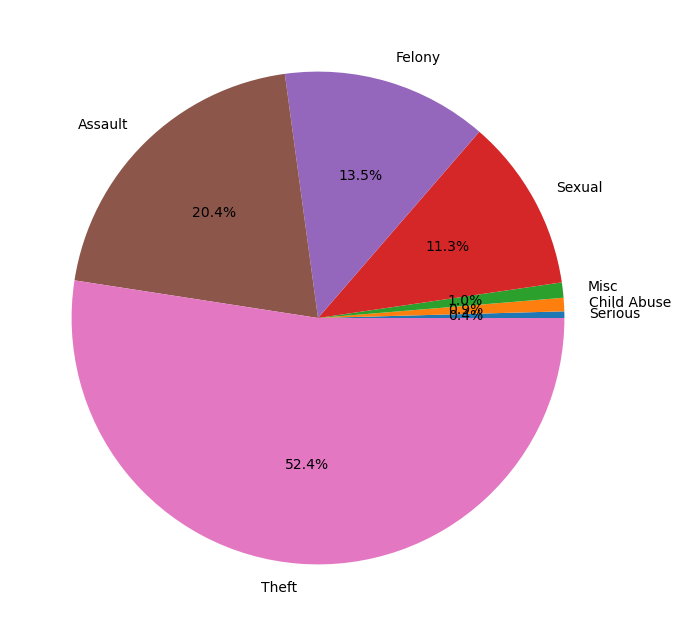

In [24]:
# Crime Distribution of crimes increased from 2020 to 2021 by crime types 

vf = v3.groupby("Crm Group")["Count_change"].sum().reset_index().sort_values(by = "Count_change")

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(vf['Count_change'], labels=vf['Crm Group'], autopct='%1.1f%%')
#plt.title('Crime Distribution by Group')
plt.show()

Theft is the biggest contributor of crime increase from 2020 to 2021 followed by Assault, Felony and Sexual.

### Top Crimes in Theft contributing to increase in crime from 2020 to 2021

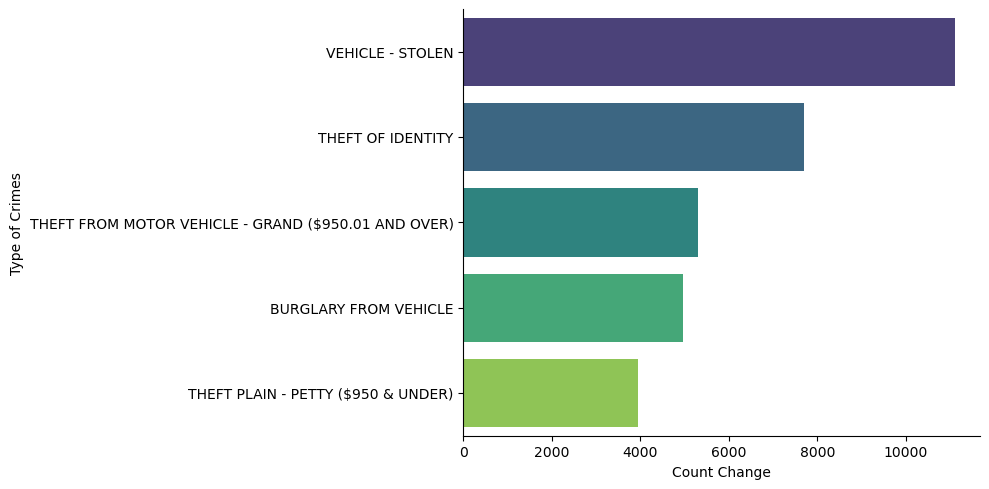

In [25]:
#Increase in Theft Crimes

graph = sns.catplot(x='Count_change', y="Crm Cd Desc", data=v3[v3["Crm Group"] == "Theft"], kind = "bar", aspect = 2, palette='viridis')
graph.set_axis_labels("Count Change", "Type of Crimes")
#plt.title("Increase in Theft Crimes")

The biggest contributors of increase in theft crime was increase in vehile stolen followed by theft of identity.

### Top Crimes in Assault contributing to increase in crime from 2020 to 2021

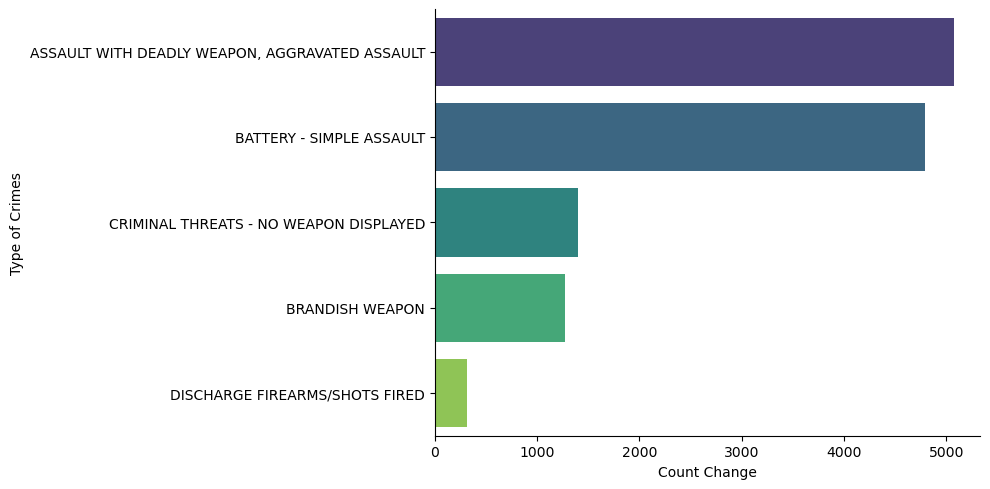

In [26]:
#Increase in Assault Crimes

graph = sns.catplot(x='Count_change', y="Crm Cd Desc", data=v3[v3["Crm Group"] == "Assault"], kind = "bar", aspect = 2, palette='viridis')
graph.set_axis_labels("Count Change", "Type of Crimes")
#plt.title("Increase in Assault Crimes")

The biggest contributors of increase in Assault crime was increase in assault by deadly weapon followed by battery.

### Top Crimes in Felony contributing to increase in crime from 2020 to 2021

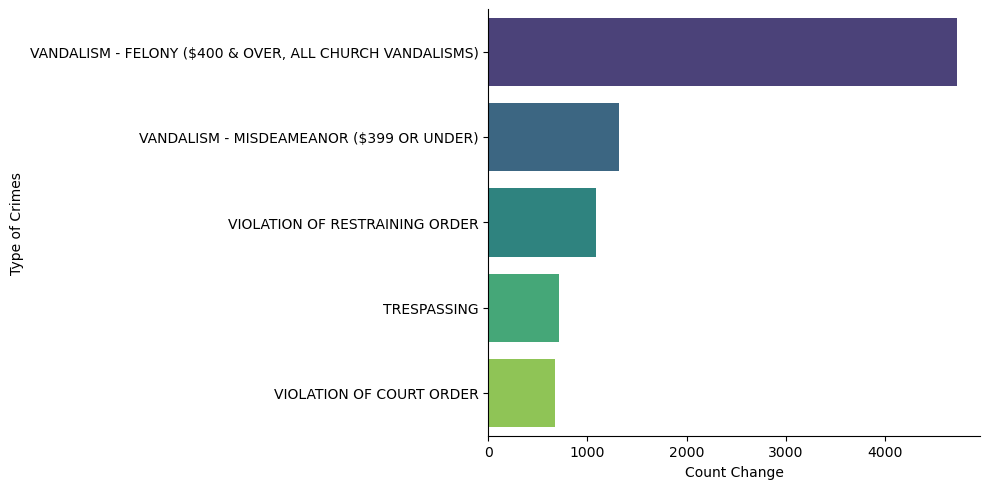

In [27]:
#Increase in Felony Crimes
graph = sns.catplot(x='Count_change', y="Crm Cd Desc", data=v3[v3["Crm Group"] == "Felony"], kind = "bar", aspect = 2, palette='viridis')
graph.set_axis_labels("Count Change", "Type of Crimes")
#plt.title("Increase in Felony Crimes")

The biggest contributors of increase in Felony crime was increase in Vandalism - felony.

### Top Crimes in Sexual group contributing to increase in crime from 2020 to 2021

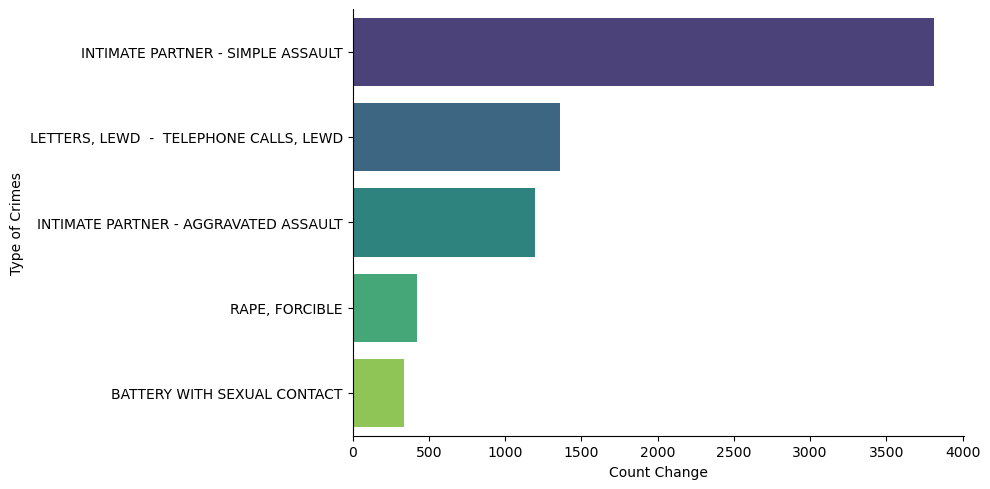

In [28]:
#Increase in Sexual Crimes
graph = sns.catplot(x='Count_change', y="Crm Cd Desc", data=v3[v3["Crm Group"] == "Sexual"], kind = "bar", aspect = 2, palette='viridis')
graph.set_axis_labels("Count Change", "Type of Crimes")
#plt.title("Increase in Sexual Crimes")

The biggest contributors of increase in Sexual crime was increase in Intimate partner - Simple Assault

### Proportion of crimes by sex from 2019 to 2022

In [29]:
dt = data.groupby(["Vict Sex", "OCC Year"])["Crm Cd"].size().reset_index(name="Counts")
# Create a pivot table
pivot_table = dt.pivot_table(index='Vict Sex', columns='OCC Year', values='Counts', aggfunc='sum', margins=True, margins_name='Total')
pivot_table

# Calculate the percentage increase from the previous year
percentage_increase_df = round(pivot_table.pct_change(axis=1) * 100, 2)

# Drop the first column (NaN values for percentage increase from the previous year)
percentage_increase_df = percentage_increase_df.iloc[:, 1:]

percentage_increase_df.drop(["Total"], axis=1, inplace=True)

percentage_increase_df

OCC Year,2019,2020,2021,2022,Total
Vict Sex,,,,,
F,87051,72495,103814,89133,352493
M,96865,84827,117886,95392,394970
X,34783,42095,58501,49739,185118
Total,218699,199417,280201,234264,932581


OCC Year,2020,2021,2022
Vict Sex,,,
F,-16.72,43.20,-14.14
M,-12.43,38.97,-19.08
X,21.02,38.97,-14.98
Total,-8.82,40.51,-16.39


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Vict Sex', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Year and Sex')

Text(0.5, 0, 'Vict Sex')

Text(0, 0.5, 'Normalized Total Crime')

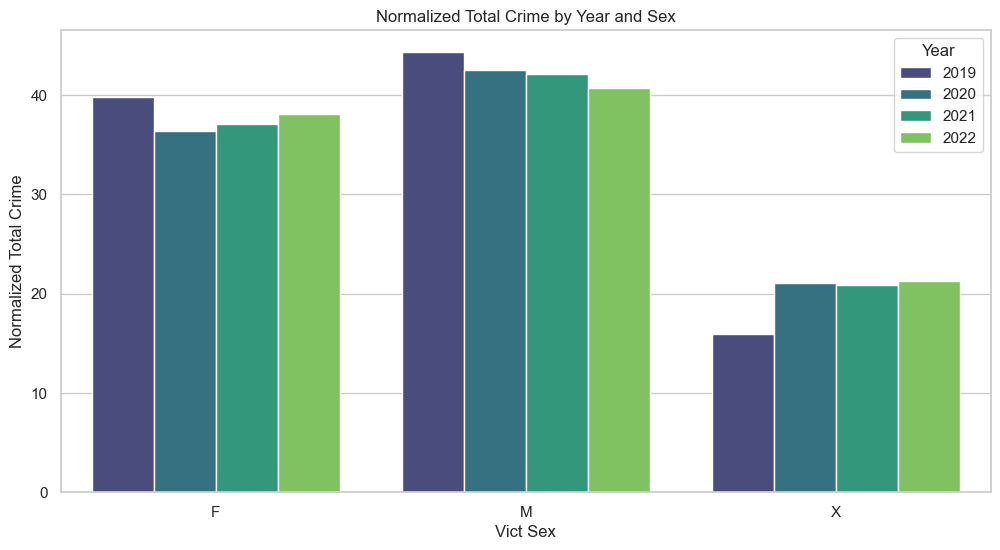

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate normalized counts
normalized_counts = (data.groupby(["OCC Year", "Vict Sex"]).size() / data.groupby("OCC Year").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100

# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Vict Sex", y="Normalized Count", hue="OCC Year", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Year and Sex')
plt.xlabel('Vict Sex')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()


Over the years,the proportion of Crimes on Females has increased while the proportion of Crimes on Males has decreased *(Crime where sex is unknown has not been considered)*.

### Top 3 Descent groups with Maximum Crimes

In [31]:
# Counting total crimes occured in each crime type
crime_counts = data["Vict Descent"].value_counts().to_frame().reset_index().rename(columns={'index': 'Vict Descent', 'Vict Descent':'count'})

# Selecting top 4 crime types occured
v1 = list(crime_counts["Vict Descent"].head(3))
#crime_counts['norm count'] = crime_counts['count']
v1

['H', 'W', 'B']

### Proportion of  Crimes by Ethnicity from 2019 to 2022

In [32]:
dt = data.groupby(["Vict Descent 1", "OCC Year"])["Crm Cd"].size().reset_index(name="Counts")
# Create a pivot table
pivot_table = dt.pivot_table(index='Vict Descent 1', columns='OCC Year', values='Counts', aggfunc='sum', margins=True, margins_name='Total')
pivot_table

# Calculate the percentage increase from the previous year
percentage_increase_df = round(pivot_table.pct_change(axis=1) * 100, 2)

# Drop the first column (NaN values for percentage increase from the previous year)
percentage_increase_df = percentage_increase_df.iloc[:, 1:]

percentage_increase_df.drop(["Total"], axis=1, inplace=True)

percentage_increase_df

OCC Year,2019,2020,2021,2022,Total
Vict Descent 1,,,,,
B,33109,28643,38653,34495,134900
H,72389,61485,86803,72808,293485
Others,47285,48282,72830,58575,226972
W,48802,42552,58819,46424,196597
X,17114,18455,23096,21962,80627
Total,218699,199417,280201,234264,932581


OCC Year,2020,2021,2022
Vict Descent 1,,,
B,-13.49,34.95,-10.76
H,-15.06,41.18,-16.12
Others,2.11,50.84,-19.57
W,-12.81,38.23,-21.07
X,7.84,25.15,-4.91
Total,-8.82,40.51,-16.39


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Vict Descent 1', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Year and Ethnicity')

Text(0.5, 0, 'Vict Descent')

Text(0, 0.5, 'Normalized Total Crime')

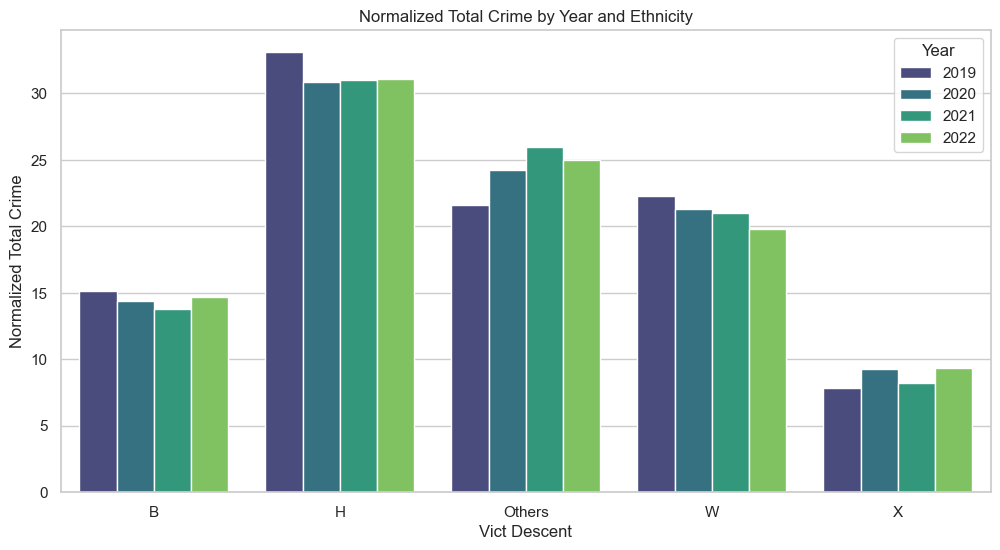

In [33]:
# Counts of crimes by year and Ethnicity

# Calculate normalized counts
normalized_counts = (data.groupby(["OCC Year", "Vict Descent 1"]).size() / data.groupby("OCC Year").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100



# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Vict Descent 1", y="Normalized Count", hue="OCC Year", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Year and Ethnicity')
plt.xlabel('Vict Descent')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()

While the trend across 4 years is similar for proportion of crimes on hispanic, white and black victims. The proportion of crime on Black victims has increased in 2022 however for whites, its has decreased.

### Proportion of Crimes by age buckets from 2019 to 2022

In [34]:
dt = data.groupby(["Age buckets", "OCC Year"])["Crm Cd"].size().reset_index(name="Counts")
# Create a pivot table
pivot_table = dt.pivot_table(index='Age buckets', columns='OCC Year', values='Counts', aggfunc='sum', margins=True, margins_name='Total')
pivot_table

# Calculate the percentage increase from the previous year
percentage_increase_df = round(pivot_table.pct_change(axis=1) * 100, 2)

# Drop the first column (NaN values for percentage increase from the previous year)
percentage_increase_df = percentage_increase_df.iloc[:, 1:]

percentage_increase_df.drop(["Total"], axis=1, inplace=True)

percentage_increase_df

OCC Year,2019,2020,2021,2022,Total
Age buckets,,,,,
Unknown,41803,48383,66985,56065,213236
Child,2649,1811,2447,1897,8804
Teenager,11008,8110,8885,7790,35793
Young Adult,86050,74009,107673,91715,359447
Middle Aged Adult,55351,48484,67780,54971,226586
Senior Adult,21825,18619,26431,21826,88701
Total,218686,199416,280201,234264,932567


OCC Year,2020,2021,2022
Age buckets,,,
Unknown,15.74,38.45,-16.30
Child,-31.63,35.12,-22.48
Teenager,-26.33,9.56,-12.32
Young Adult,-13.99,45.49,-14.82
Middle Aged Adult,-12.41,39.80,-18.90
Senior Adult,-14.69,41.96,-17.42
Total,-8.81,40.51,-16.39


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Age buckets', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Year and Age Buckets')

Text(0.5, 0, 'Age buckets')

Text(0, 0.5, 'Normalized Total Crime')

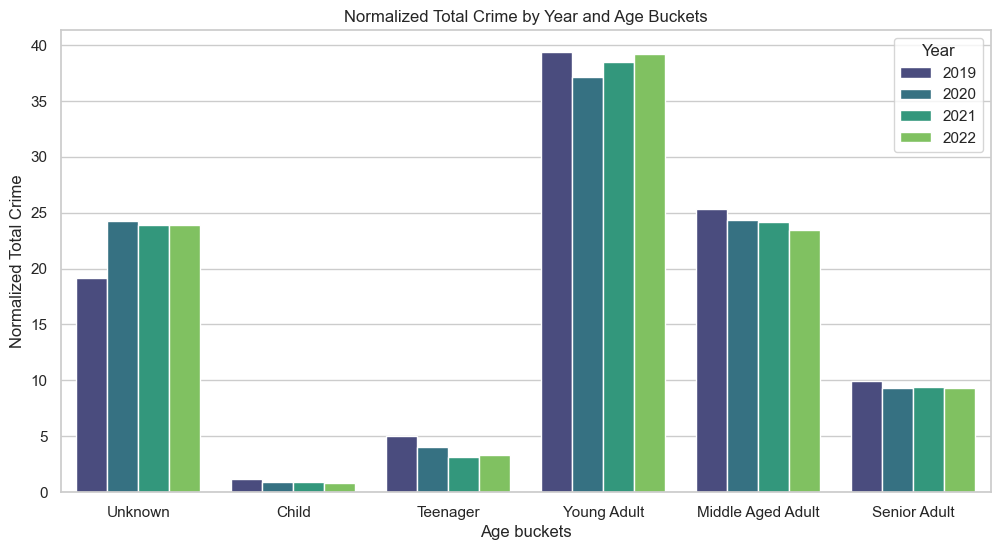

In [35]:
# Crimes trend from 2019 to 2022 for each age bucket

# Counts of crimes by year and Ethnicity

# Calculate normalized counts
normalized_counts = (data.groupby(["OCC Year", "Age buckets"]).size() / data.groupby("OCC Year").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100


# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Age buckets", y="Normalized Count", hue="OCC Year", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Year and Age Buckets')
plt.xlabel('Age buckets')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()


Post COVID (2020), the crime proportion is following a similar pattern for Child, Teenager, Middle Aged Adult, Senior Adult that is decrease in crime proportion. However, for young adult crime proportion is increasing over years after 2020.

## Insights for Finding - 1:

The initial decrease in total crimes during 2020 is attributed to the impact of the COVID-19 pandemic and associated lockdowns. However, a significant upswing in total crimes occurred in 2021, potentially linked to economic challenges post-pandemic. In 2021, there were a total of 280,201 crime occurrences, which was a 41% increase from 2020. This was driven by a 45% increase in Theft and 34.7% increase in Assault Crime Categories. In 2022, the crime occurrences reduced to 234,264 crime occurrences, which was a 16% decrease. This was driven by a 12.5% decrease in Theft and 37.9% decrease in Felony.

Notably, crimes peak during weekends, particularly on Fridays and Saturdays, with heightened levels observed in the afternoon and post 4 p.m. The post-COVID landscape witnesses a shift in crime composition, with an increase in theft proportions and a decrease in felony occurrences. Within specific crime categories, the surge in theft is primarily driven by vehicle theft and identity theft. Assault incidents rise, driven by assaults with deadly weapons and battery. Felony crime increases are largely attributed to vandalism, while sexual crimes surge, especially in the category of intimate partner simple assault. 

A demographic analysis indicates a rising proportion of crimes against females, shifts in crime proportions across age groups, increase in crimes against Black victims in 2022 and a decrease against White victims. The post-COVID era also introduces nuanced patterns in age group-based crime proportions, emphasizing the complexity and evolving nature of crime dynamics over the years.


## Crime Concentration analysis by Area - Finding 2

### High frequency crime areas

AREA NAME
Central        17668
77th Street    14527
Southwest      13361
Pacific        13004
Hollywood      12509
Olympic        12014
Newton         11907
Southeast      11707
Rampart        11167
N Hollywood    11135
Name: AREA NAME, dtype: int64

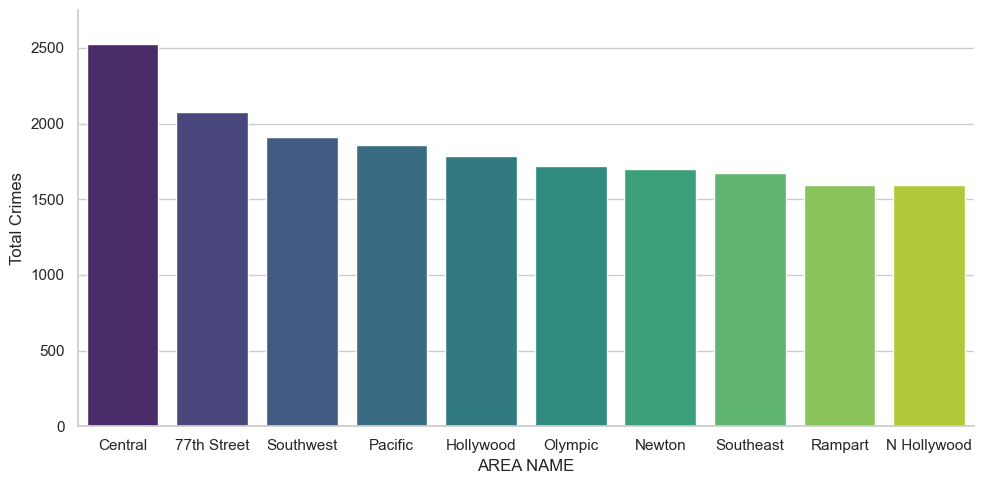

In [36]:
# Top 10 high frequency crime areas
freq_areas=data_2022.groupby(["AREA NAME"])["AREA NAME"].count().nlargest(10)
freq_areas

#data filtered for high frequency crime areas
data_freqareas=data_2022[data_2022["AREA NAME"].isin(freq_areas.index)].groupby(["AREA NAME","Crm Group"]).agg({"AREA":"count"}).rename(columns={"AREA":"Total Crimes"}).reset_index()

#Plotting high frequency crime areas
plot=sns.catplot(data=data_freqareas,x="AREA NAME",y="Total Crimes",kind="bar",aspect=2,order=freq_areas.index,errwidth=0, palette='viridis')
plot.set(ylim=(0, 2750))



Highly targeted areas are Central, followed by 77th Street

### Crime groups for high frequency crime areas

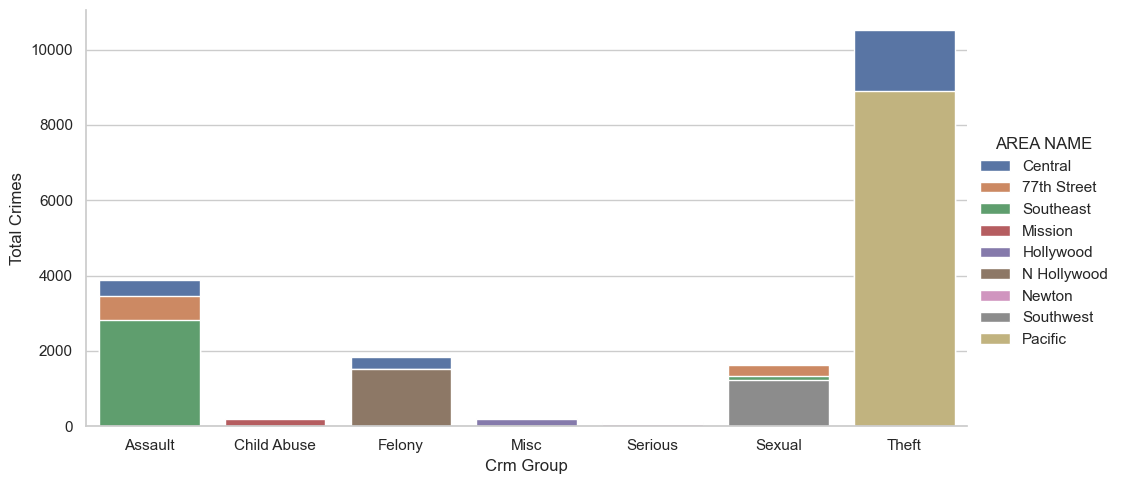

In [37]:

data_arcg=data_2022.groupby(["Crm Group","AREA NAME",]).agg({"AREA":"count"}).rename(columns={"AREA":"Occurences"}).reset_index()
#filter for the top 5 area names per crime group
data_arcg_sort=data_arcg.sort_values(by=["Crm Group", "Occurences"], ascending=[True, False]).rename(columns={"Occurences":"Total Crimes"})
data_arcg_sort=data_arcg_sort.groupby("Crm Group").head(3).reset_index(drop=True)
#plot area name by crime types
sns.catplot(data=data_arcg_sort,hue="AREA NAME",y="Total Crimes",kind="bar",x="Crm Group",aspect=2,dodge=False)


Theft is high in Pacific and Central. Sexual crimes are high in Southwest and 77th Street.Assault in Southeast, 77th Street and Central

### High frequency crime areas with gender

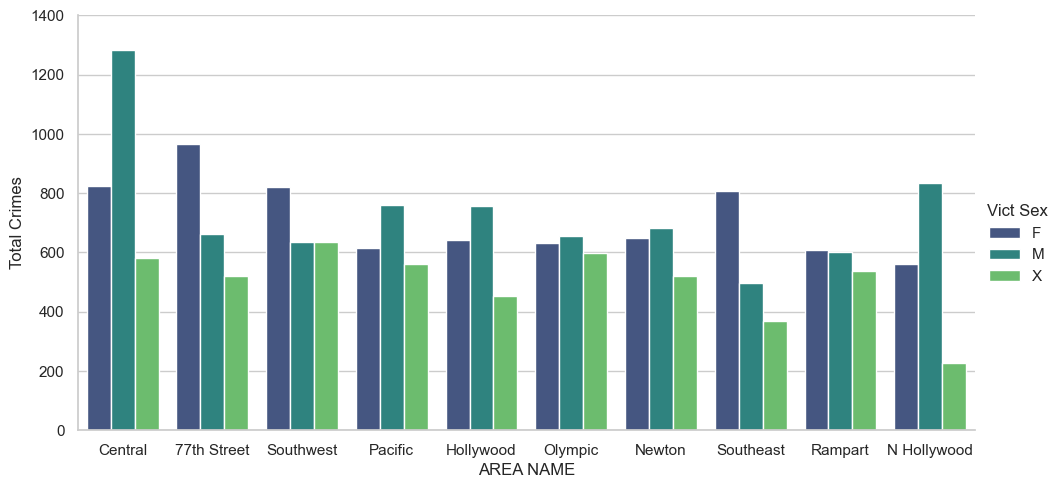

In [38]:
#data filtered for high frequency crime areas with gender
data_freqareas_sex=data_2022[data_2022["AREA NAME"].isin(freq_areas.index)].groupby(["AREA NAME","Crm Group","Vict Sex"]).agg({"AREA":"count"}).rename(columns={"AREA":"Total Crimes","AREA NAME":"Area Name"}).reset_index()
#Plotting data
plot1=sns.catplot(data=data_freqareas_sex,x="AREA NAME",y="Total Crimes",hue="Vict Sex",kind="bar", aspect=2, order=freq_areas.index,errwidth=0, palette='viridis')
plot1.set(ylim=(0, 1400))

Crimes on females are high as compared to males in 77th Street, Southwest and Southeast. However, males are more targeted in Central, Pacific, Hollywood and N Hollywood.

### High frequency crime areas with Ethnicity

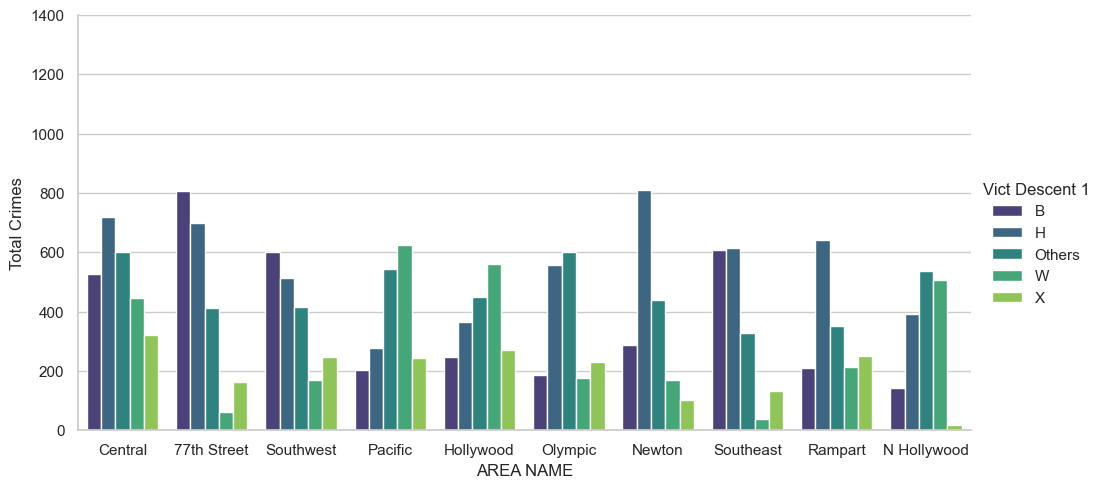

In [39]:
#data filtered for high frequency crime areas with gender
data_freqareas_sex=data_2022[data_2022["AREA NAME"].isin(freq_areas.index)].groupby(["AREA NAME","Crm Group","Vict Descent 1"]).agg({"AREA":"count"}).rename(columns={"AREA":"Total Crimes","AREA NAME":"Area Name"}).reset_index()
#Plotting data
plot1=sns.catplot(data=data_freqareas_sex,x="AREA NAME",y="Total Crimes",hue="Vict Descent 1",kind="bar", aspect=2, order=freq_areas.index,errwidth=0, palette='viridis')
plot1.set(ylim=(0, 1400))

In 77th Street and Southwest, Black victims are most targeted. In Central, Newton and Rampant, Hispanic victims are the most targeted ones. In Pacific and Hollywood, White victims are majorly targeted. In Olympic and N Hollywood, victims other than these ethnicities are targeted most.

### Top 4 affected areas yearly from 2019 to 2022

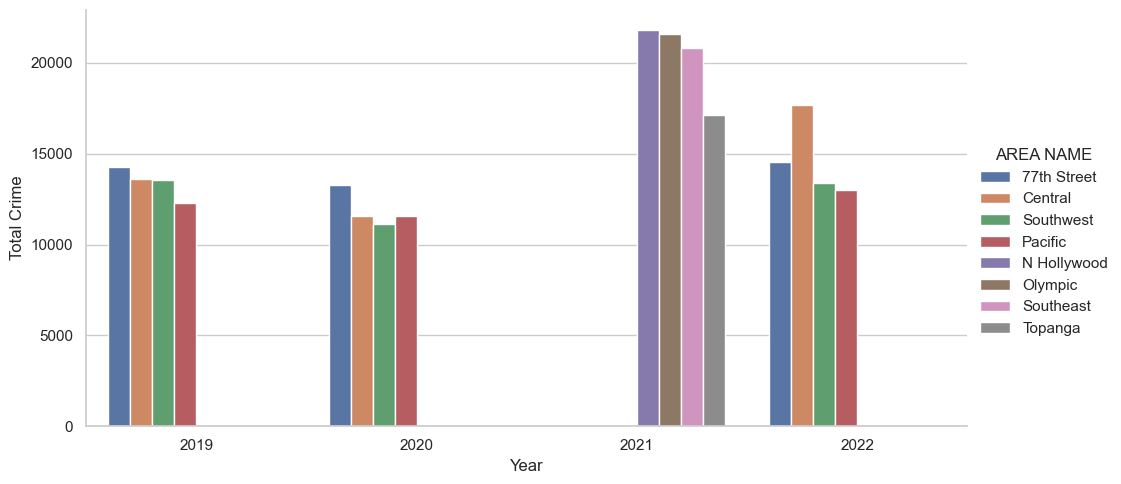

In [40]:
#Total crime counts by area and year
data_yrwise=data.groupby(["OCC Year","AREA NAME"]).agg({"AREA":"count"}).reset_index().rename(columns={"AREA":"Occurences"})

data_yrwise_sort=data_yrwise.sort_values(by=["OCC Year", "Occurences"], ascending=[True, False]).rename(columns={"OCC Year":"Year", "Occurences":"Total Crime"})

data_yrwise_sort=data_yrwise_sort.groupby("Year").head(4).reset_index(drop=True)
#plot of total crimes from 2019 to 2023 for each area
sns.catplot(data=data_yrwise_sort,hue="AREA NAME",y="Total Crime",kind="bar",x="Year",aspect=2)


77th Street, Central, Southwest, Pacific are the top affected areas in 2019, 2020 and 2022. However, we see an anamoly post COVID in 2021, Top affected areas are N Hollywood, Olympic, Southeast, Topanga

### Crime concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Total Crimes by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

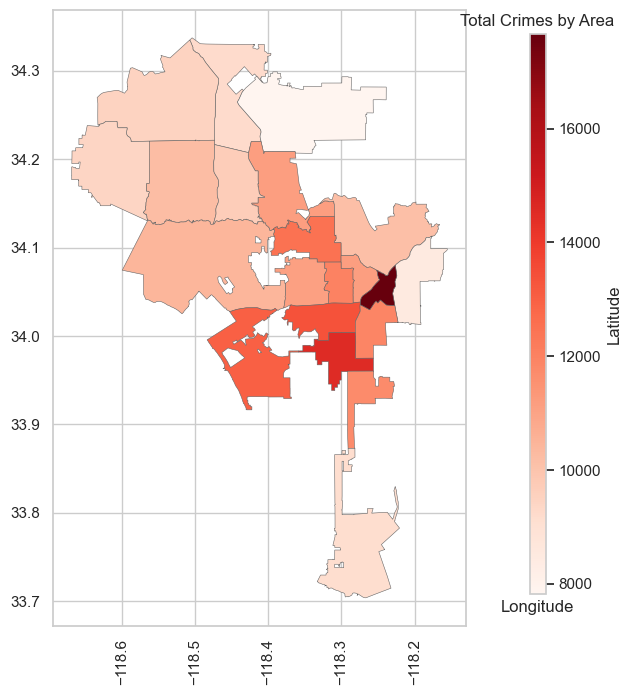

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
la_map = gpd.read_file("LAPD_Divisions.shp")

# Filter data for the desired year
df_area = data[data["OCC Year"] == 2022]["AREA"].value_counts().reset_index().rename(columns={"index": "AREA", "AREA": "count"})

# Merge data with shapefile
map1 = la_map.merge(df_area, left_on="PREC", right_on="AREA", how="left")

# Plot the map
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map1.plot(column="count", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Total Crimes by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Population concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Total Population by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

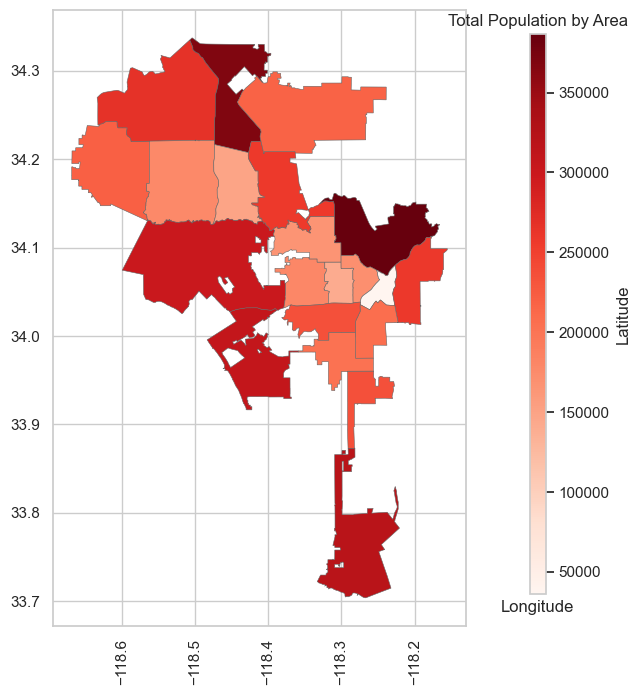

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile for police station locations
la_map = gpd.read_file("LAPD_Divisions.shp")

# Read the shapefile for demographics
la_pop = gpd.read_file("Los_Angeles_Demographics_2019.shp")

# Create a copy of the original DataFrame to avoid modifying the original data
gdf_la_assigned = la_pop.copy()

# Create a new GeoDataFrame to store the police station geometries
gdf_result = gpd.GeoDataFrame(columns=['nearest_station', 'TOTPOP_CY'], geometry='nearest_station', crs=gdf_la_assigned.crs)

# Function to find the nearest police station for a point
def find_nearest_station(point, stations):
    nearest_station = min(stations, key=lambda station: point.distance(station))
    return nearest_station

# Find the nearest police station for each point using apply
gdf_la_assigned['nearest_station'] = gdf_la_assigned.geometry.apply(
    lambda point: find_nearest_station(point, la_map.geometry)
)

# Group by the assigned police station and calculate the sum of the populations
result = gdf_la_assigned.groupby('nearest_station')['TOTPOP_CY'].sum().reset_index()

result1 = gpd.GeoDataFrame(result, geometry=result["nearest_station"])

# Plot the map
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
result1.plot(column="TOTPOP_CY", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7]) 

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=result1["TOTPOP_CY"].min(), vmax=result1["TOTPOP_CY"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Total Population by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


Population density and Crime concentration in LA are inversely related

### Household income concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Average Household Income by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

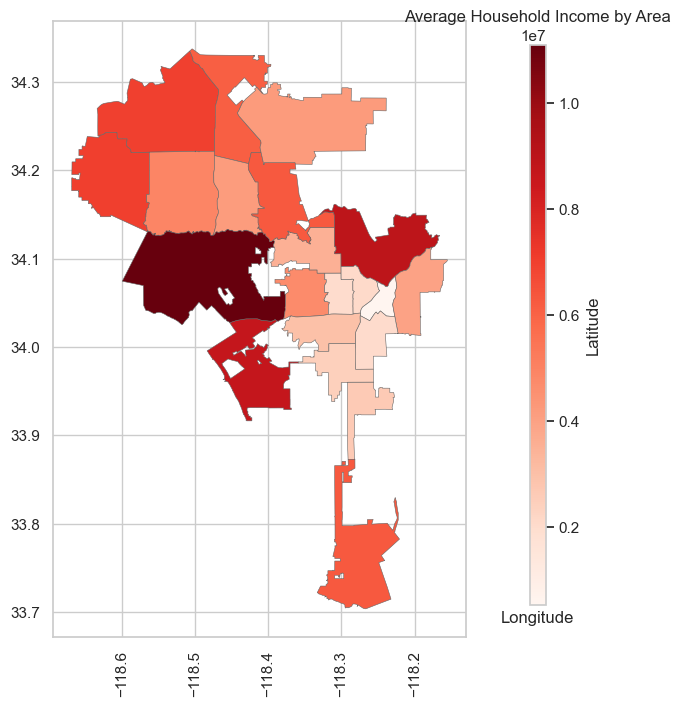

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Group by the assigned police station and calculate the sum of the populations
result = gdf_la_assigned.groupby('nearest_station')['AVGHINC_CY'].sum().reset_index()

result1 = gpd.GeoDataFrame(result, geometry=result["nearest_station"])

# Plot the map
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
result1.plot(column="AVGHINC_CY", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=result1["AVGHINC_CY"].min(), vmax=result1["AVGHINC_CY"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Average Household Income by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


Household density and Crime concentration in LA are inversely related

### Hispanic population concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Percentage Hispanic by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

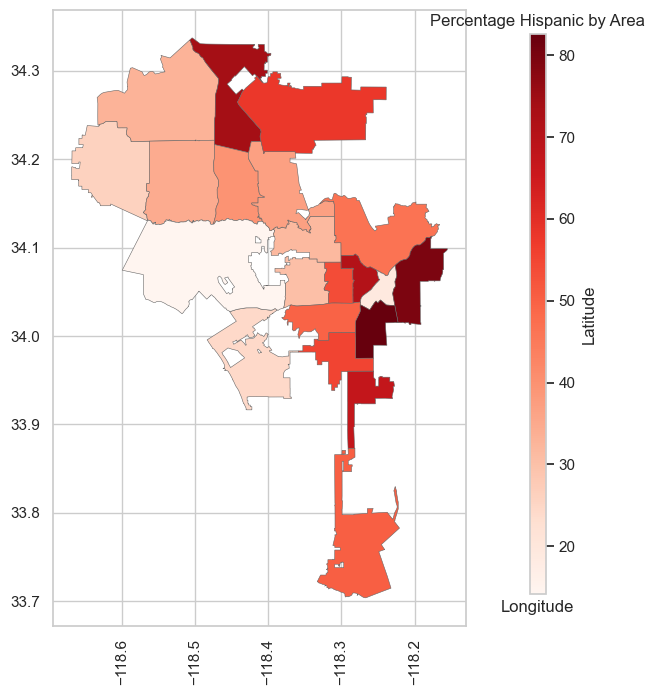

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Group by the assigned police station and calculate the sum of the populations for each column
result = gdf_la_assigned.groupby('nearest_station').agg({'TOTPOP_CY': 'sum', 'HISPPOP_CY': 'sum'}).reset_index()

# Rename the columns in the result GeoDataFrame
result.columns = ['nearest_station', 'TOTPOP_CY', 'HISPPOP_CY']

# Create a GeoDataFrame with the result
result_geo = gpd.GeoDataFrame(result, geometry='nearest_station', crs=gdf_la_assigned.crs)
result_geo["Hisp_Perc"] = result_geo["HISPPOP_CY"] / result_geo["TOTPOP_CY"] * 100

result1 = gpd.GeoDataFrame(result_geo, geometry=result["nearest_station"])

# Plot the map
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
result1.plot(column="Hisp_Perc", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=result1["Hisp_Perc"].min(), vmax=result1["Hisp_Perc"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Percentage Hispanic by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Crime concentration on Hispanic by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Total Crimes on Hispanic by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

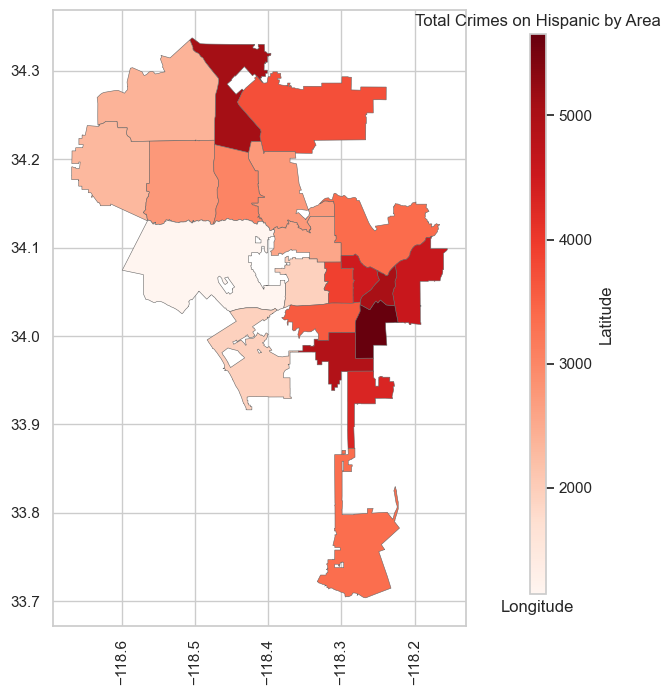

In [45]:
# Filter data for the specific conditions
df_area = data[(data["OCC Year"] == 2022) & (data["Vict Descent"] == "H")]["AREA"].value_counts().reset_index().rename(columns={"index":"AREA", "AREA":"count"})

# Merge with the map
map1 = la_map.merge(df_area, left_on="PREC", right_on="AREA", how="left")

# Plot the map
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map1.plot(column="count", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Total Crimes on Hispanic by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


On average, Crime concentration on Hispanic is higher in area with higher Hispanic poulation

### White population concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Percentage White by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

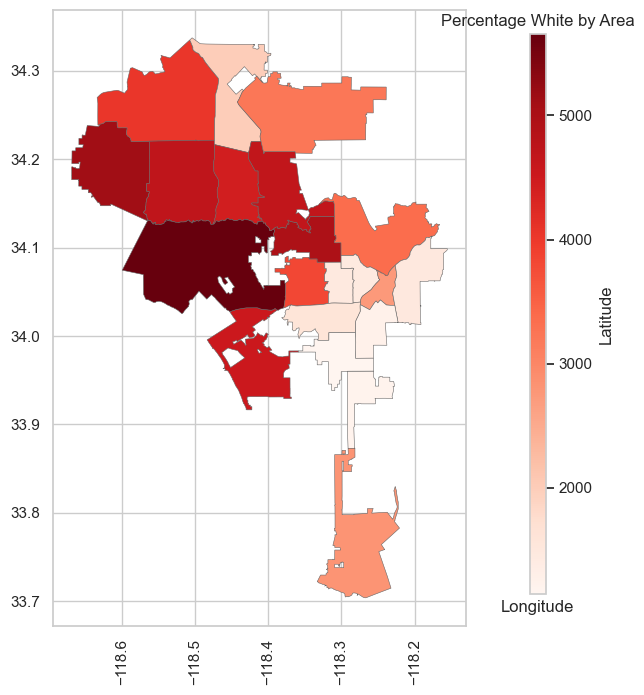

In [46]:
# Create a copy of the original DataFrame to avoid modifying the original data
gdf_la_assigned = la_pop.copy()

# Create a new GeoDataFrame to store the police station geometries
gdf_result = gpd.GeoDataFrame(columns=['nearest_station', 'TOTPOP_CY', 'NHSPWHT_CY'], geometry='nearest_station', crs=gdf_la_assigned.crs)

# Function to find the nearest police station for a point
def find_nearest_station(point, stations):
    nearest_station = min(stations, key=lambda station: point.distance(station))
    return nearest_station

# Find the nearest police station for each point using apply
gdf_la_assigned['nearest_station'] = gdf_la_assigned.geometry.apply(
    lambda point: find_nearest_station(point, map1.geometry)
)

# Group by the assigned police station and calculate the sum of the populations for each column
result = gdf_la_assigned.groupby('nearest_station').agg({'TOTPOP_CY': 'sum', 'NHSPWHT_CY': 'sum'}).reset_index()

# Rename the columns in the result GeoDataFrame
result.columns = ['nearest_station', 'TOTPOP_CY', 'NHSPWHT_CY']

# Create a GeoDataFrame with the result
result_geo = gpd.GeoDataFrame(result, geometry='nearest_station', crs=gdf_la_assigned.crs)
result_geo["White_Perc"] = result_geo["NHSPWHT_CY"]/result_geo["TOTPOP_CY"] * 100


result1 = gpd.GeoDataFrame(result_geo, geometry=result["nearest_station"])

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
result1.plot(column="White_Perc", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)

# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)
# Set the title and axis labels
plt.title('Percentage White by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Crime concentration on White by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Total Crimes on White by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

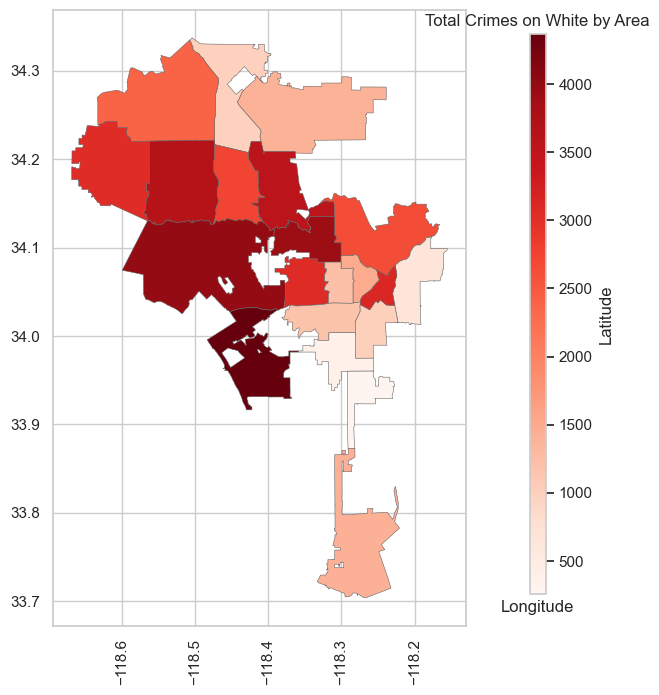

In [47]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df_area = data[(data["OCC Year"] == 2022) & (data["Vict Descent"] == "W")]["AREA"].value_counts().reset_index().rename(columns={"index":"AREA","AREA":"count"})
map1 = la_map.merge(df_area, left_on="PREC", right_on="AREA", how="left")
map1.plot(column="count", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)
# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Total Crimes on White by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

On average, Crime concentration on White is higher in area with higher White poulation

### Black Population concentration by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Percentage Black by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

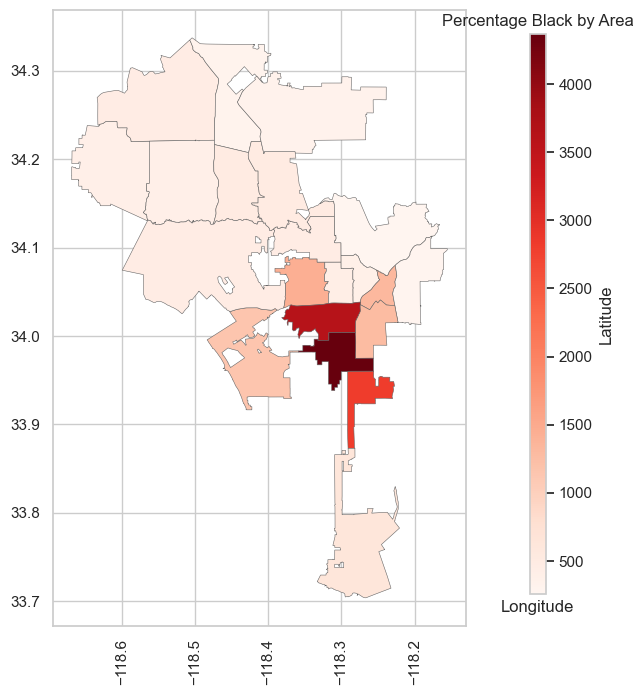

In [48]:
# Create a copy of the original DataFrame to avoid modifying the original data
gdf_la_assigned = la_pop.copy()

# Create a new GeoDataFrame to store the police station geometries
gdf_result = gpd.GeoDataFrame(columns=['nearest_station', 'TOTPOP_CY', 'NHSPBLK_CY'], geometry='nearest_station', crs=gdf_la_assigned.crs)

# Function to find the nearest police station for a point
def find_nearest_station(point, stations):
    nearest_station = min(stations, key=lambda station: point.distance(station))
    return nearest_station

# Find the nearest police station for each point using apply
gdf_la_assigned['nearest_station'] = gdf_la_assigned.geometry.apply(
    lambda point: find_nearest_station(point, map1.geometry)
)

# Group by the assigned police station and calculate the sum of the populations for each column
result = gdf_la_assigned.groupby('nearest_station').agg({'TOTPOP_CY': 'sum', 'NHSPBLK_CY': 'sum'}).reset_index()

# Rename the columns in the result GeoDataFrame
result.columns = ['nearest_station', 'TOTPOP_CY', 'NHSPBLK_CY']

# Create a GeoDataFrame with the result
result_geo = gpd.GeoDataFrame(result, geometry='nearest_station', crs=gdf_la_assigned.crs)
result_geo["Black_Perc"] = result_geo["NHSPBLK_CY"]/result_geo["TOTPOP_CY"] * 100


result1 = gpd.GeoDataFrame(result_geo, geometry=result["nearest_station"])

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
result1.plot(column="Black_Perc", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)
# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7]) 

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)

# Set the title and axis labels
plt.title('Percentage Black by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Crime concentration on Black by area

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

Text(0.5, 1.0, 'Total Crimes on Black by Area')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

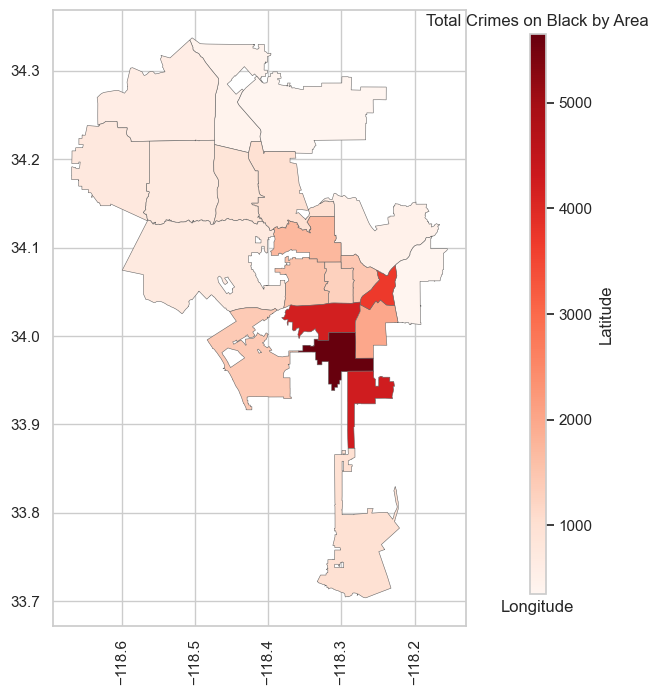

In [49]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df_area = data[(data["OCC Year"] == 2022) & (data["Vict Descent"] == "B")]["AREA"].value_counts().reset_index().rename(columns={"index":"AREA","AREA":"count"})
map1 = la_map.merge(df_area, left_on="PREC", right_on="AREA", how="left")
map1.plot(column="count", cmap="Reds", linewidth=0.4, edgecolor=".4", ax=ax)
# Create a colorbar axes
cax = fig.add_axes([0.85, 0.15, 0.02, 0.7])  # Adjust the position and size as needed

# Create a ScalarMappable for the colorbar
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=map1["count"].min(), vmax=map1["count"].max()))
bar_info._A = []

# Add colorbar to the figure using the created colorbar axes
cbar = fig.colorbar(bar_info, cax=cax)
# Set the title and axis labels
plt.title('Total Crimes on Black by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

On average, Crime concentration on Black is higher in area with higher Black poulation

## Insights from finding 2:

In 2022, Central experienced the highest crime in LA, 77th Street had the second highest crime occurrences and Southwest had the third highest crime occurrence. Theft is notably high in Pacific and Central, Sexual crimes peak in Southwest and 77th Street, and assault incidents concentrate in Southeast, 77th Street, and Central. A demographic breakdown further underscores variations, with crimes against Females prevalent in 77th Street, Southwest, and Southeast, while Males are more targeted in Central, Pacific, Hollywood, and N Hollywood. 

Hispanic victims accounted for 72,808 crime occurrences, which represented 31 percent of the total crime victims in 2022. Black victims accounted for the second highest group with 34,495 victims, or 14.7 percent, of the total. White victims had the third highest count with 46,424 victims, or 19.8 percent, of the total. Based on the U.S. Census Bureau’s estimated population figures for LA, approximately 2.3 million of the 4.8 million residents, or 47 percent, are Hispanic. White residents account for approximately 1.3 million residents, or 27 percent. Black residents account for approximately 322,553 or nine percent.


Ethnicity-based insights indicate specific regions where particular ethnic groups are most targeted. Black victims are concentrated in 77th Street and Southwest, Hispanic victims in Central, Newton, and Rampart, and White victims in Pacific and Hollywood. Areas like Olympic and N Hollywood witness a higher concentration of crimes against victims from other ethnicities. Temporal trends reveal shifts in top affected areas over the years, with Central, 77th Street, Southwest, and Pacific consistently prominent, but a notable shift post-COVID in 2021, where North Hollywood, Olympic, Southeast, and Topanga become the top affected areas. 

The analysis extends beyond crime patterns, exploring the relationship between population density and crime concentration, revealing an inverse correlation. Similar trends emerge with household density. Ethnicity-specific concentrations demonstrate higher crime rates in areas with a corresponding ethnic majority. These insights collectively depict a multifaceted landscape, emphasizing the interconnected nature of crime trends, demographic factors, and geographic concentrations in Los Angeles.


## Crimes by Victim Demographics i.e. age, sex and ethnicity - Finding 3

### Total Crime by age bucket

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age buckets', ylabel='count'>

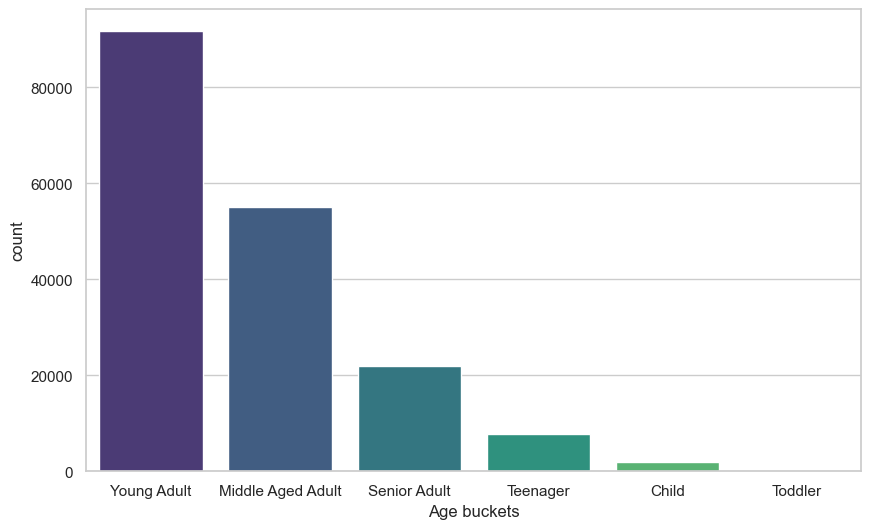

In [50]:
# Total Crime by age bucket

order = ['Young Adult', 'Middle Aged Adult', 'Senior Adult', 'Teenager', 'Child', 'Toddler']

plt.figure(figsize=(10, 6))
sns.countplot(x="Age buckets",data=data_2022, order = order, palette='viridis')

38% of crimes are on Young Adults followed by 24% crimes on Middle Aged Adults.

### Crime proportion by crime types and Sex for Young Adults

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Crm Group', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Sex and Crime Group for Young Adults')

Text(0.5, 0, 'Crime Group')

Text(0, 0.5, 'Normalized Total Crime')

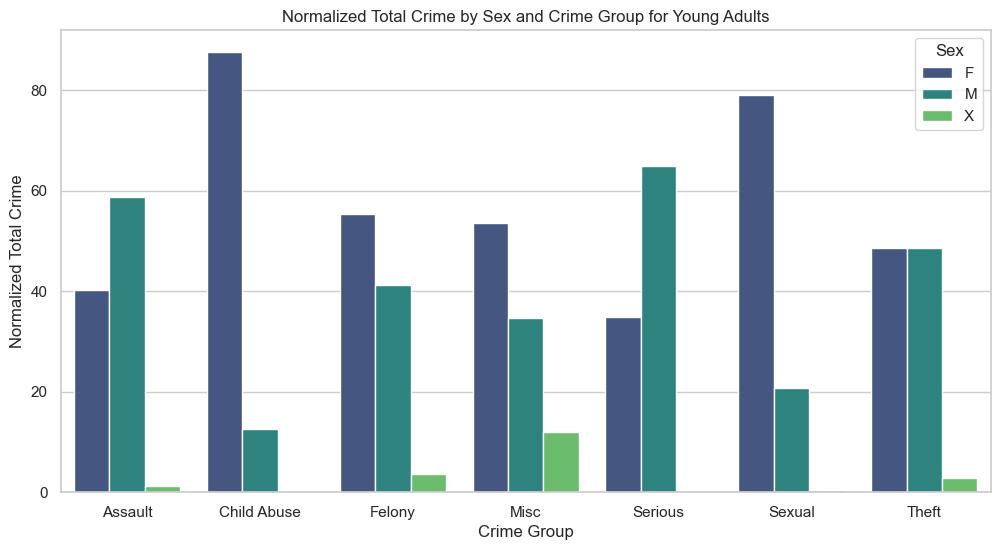

In [51]:

data_temp= data_2022[(data_2022['Age buckets'] == "Young Adult")].copy()

# Calculate normalized counts
normalized_counts = (data_temp.groupby(["Crm Group", "Vict Sex"]).size() / data_temp.groupby("Crm Group").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100


# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Crm Group", y="Normalized Count", hue="Vict Sex", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Sex and Crime Group for Young Adults')
plt.xlabel('Crime Group')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Sex')

# Show the plot
plt.show()




Distinct gender patterns in crime impact:

Child Abuse, Felony, Sexual Crimes: Disproportionate impact on females. Assault and Serious Crimes: Higher proportion of male victims. Theft: Relatively equal impact on both genders.

### Crime proportion by crime types and Ethnicity for Young Adults

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Crm Group', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Sex and Crime Group for Young Adults')

Text(0.5, 0, 'Crime Group')

Text(0, 0.5, 'Normalized Total Crime')

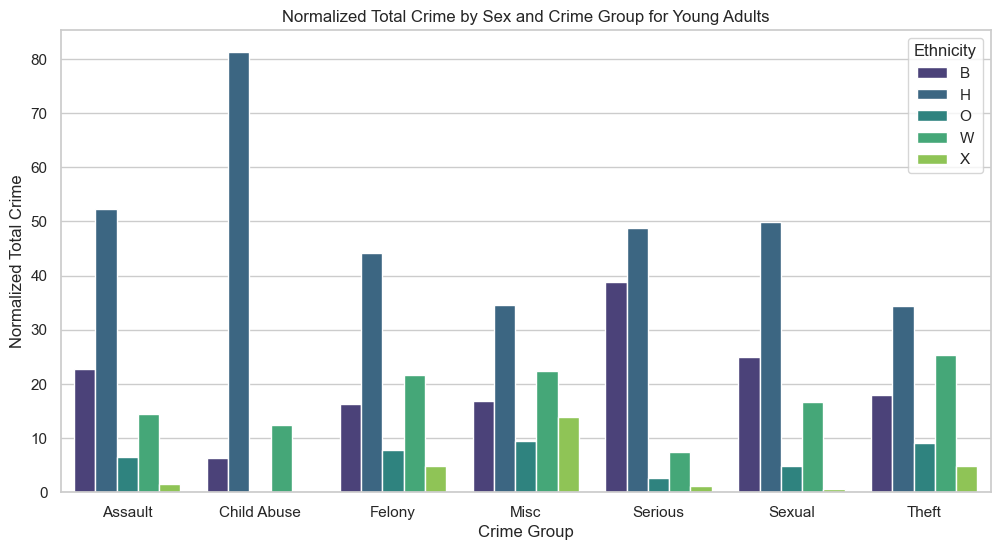

In [52]:
# Counting total crimes occured in each crime type
crime_counts = data["Vict Descent"].value_counts().to_frame().reset_index().rename(columns={'index': 'Vict Descent', 'Vict Descent':'count'})

# Selecting top 4 crime types occured
v1 = list(crime_counts["Vict Descent"].head(5))

# Total crimes by age buckets and Ethnicity
data_temp= data_2022[(data_2022['Age buckets'] == "Young Adult")].copy()


# Calculate normalized counts
normalized_counts = (data_temp[data_temp["Vict Descent"].isin(v1)].groupby(["Crm Group", "Vict Descent"]).size() / data_temp.groupby("Crm Group").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100


# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Crm Group", y="Normalized Count", hue="Vict Descent", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Sex and Crime Group for Young Adults')
plt.xlabel('Crime Group')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Ethnicity')

# Show the plot
plt.show()




Hispanic victims are notably high in Child Abuse and consistently high across all crime types. Followed by black victims predominate in Serious, Sexual, and Assault crimes. Followed by white victims with high proportions in Felony, Theft, and Child Abuse.

### Crime proportion by crime types and Sex for Middle Aged Adults

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Crm Group', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Sex and Crime Group for Middle Aged Adults')

Text(0.5, 0, 'Crime Group')

Text(0, 0.5, 'Normalized Total Crime')

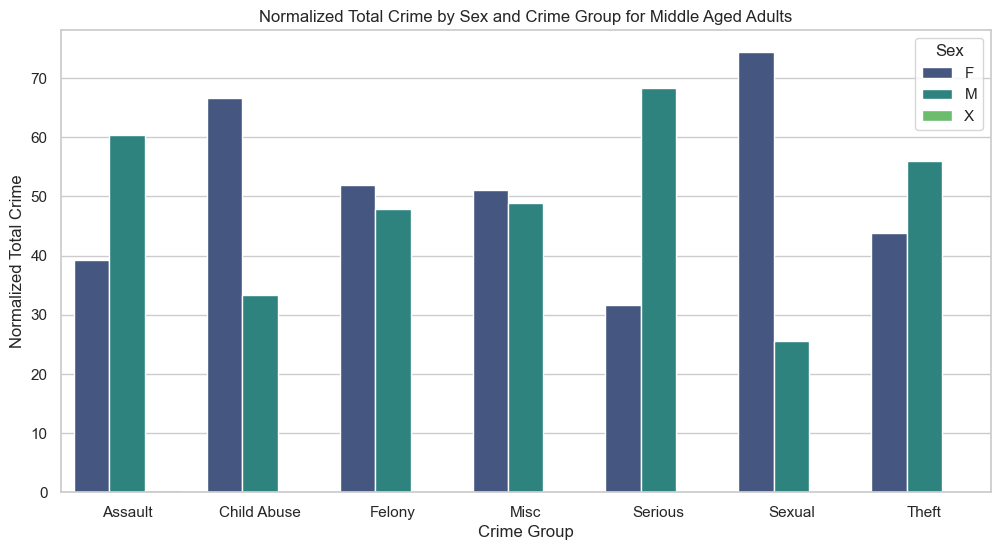

In [53]:

data_temp= data_2022[(data_2022['Age buckets'] == "Middle Aged Adult")].copy()

# Calculate normalized counts
normalized_counts = (data_temp.groupby(["Crm Group", "Vict Sex"]).size() / data_temp.groupby("Crm Group").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100


# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Crm Group", y="Normalized Count", hue="Vict Sex", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Sex and Crime Group for Middle Aged Adults')
plt.xlabel('Crime Group')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Sex')

# Show the plot
plt.show()




Crimes on males is higher in the middle aged adults and senior adults age bracket, while in young adults crime is higher on females

### Crime proportion by crime types and Ethnicity for Middle Aged Adults

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Crm Group', ylabel='Normalized Count'>

Text(0.5, 1.0, 'Normalized Total Crime by Sex and Crime Group for Middle Aged Adults')

Text(0.5, 0, 'Crime Group')

Text(0, 0.5, 'Normalized Total Crime')

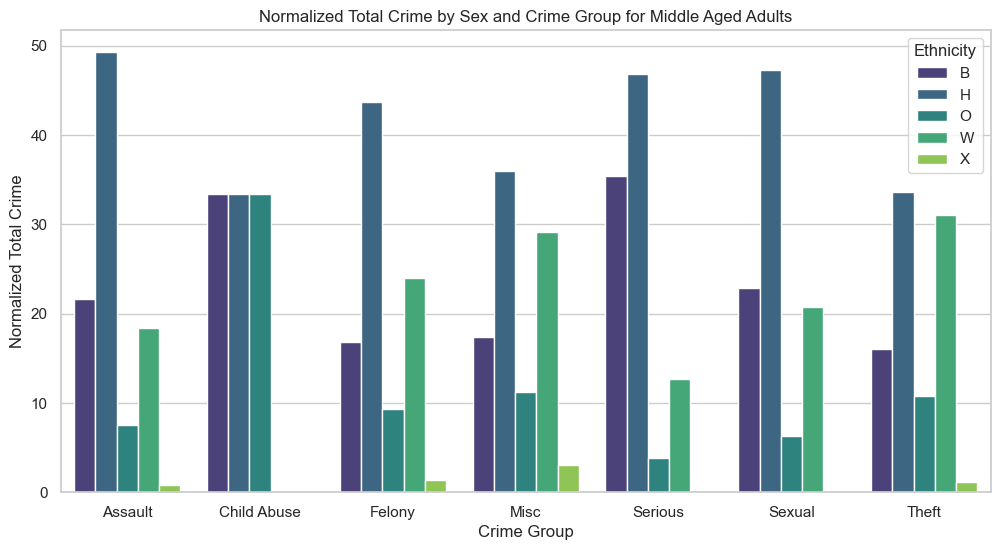

In [54]:
# Counting total crimes occured in each crime type
crime_counts = data["Vict Descent"].value_counts().to_frame().reset_index().rename(columns={'index': 'Vict Descent', 'Vict Descent':'count'})

# Selecting top 4 crime types occured
v1 = list(crime_counts["Vict Descent"].head(5))

# Total crimes by age buckets and Ethnicity
data_temp= data_2022[(data_2022['Age buckets'] == "Middle Aged Adult")].copy()


# Calculate normalized counts
normalized_counts = (data_temp[data_temp["Vict Descent"].isin(v1)].groupby(["Crm Group", "Vict Descent"]).size() / data_temp.groupby("Crm Group").size()).reset_index(name="Normalized Count")
normalized_counts["Normalized Count"] = normalized_counts["Normalized Count"] * 100


# Set the style
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot with normalized counts
sns.barplot(x="Crm Group", y="Normalized Count", hue="Vict Descent", data=normalized_counts, palette='viridis')

# Set the title and axis labels
plt.title('Normalized Total Crime by Sex and Crime Group for Middle Aged Adults')
plt.xlabel('Crime Group')
plt.ylabel('Normalized Total Crime')

# Add legend
plt.legend(title='Ethnicity')

# Show the plot
plt.show()




### Insights from Finding 3:

In 2022, 40.7% of victims were Males, 38.1% were Females and the remaining were unidentified. The concentration of crimes on Females increased while that on Males decreased compared to 2021. Crime types show varying impacts on genders, with child abuse, felony, and sexual crimes disproportionately affecting females, while assault and serious crimes exhibit a higher proportion of male victims. Theft, however, impacts both genders relatively equally. 

38% of victims belonged to the Young Adult age bucket, 24% of victims belonged to the Middle Aged adult age bucket. This represented a slight increase in the concentration of crimes on young adults and a slight decrease for Middle Aged adults

Ethnicity-based disparities emerge, with Hispanic victims notably high in Child Abuse and consistently prevalent across all crime types. Black victims predominate in Serious, Sexual, and Assault crimes, followed by White victims with high proportions in felony, theft, and child abuse. 

The age-gender analysis further underscores distinct patterns, revealing higher crime rates against males in the middle-aged and senior adult brackets, while crimes against young adults are higher among females. These insights collectively portray a complex interplay of demographics in shaping crime dynamics, emphasizing the need for targeted interventions based on age, gender, and ethnicity.

## Using ML for Classification and Prediction

In [55]:
# Importing necessary libraries
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

### Creating a binary variable for Severe crimes(Crime types included : Serious, Child Abuse, Assualt, Sexual ) 

In [56]:
# Considering Serious, Child Abuse, Assualt, Sexual crime types in Sever category and creating a binary variable  
data["Severe"] = (data["Crm Group"].isin(['Serious', 'Child Abuse', 'Assault', 'Sexual']) ) + 0

### Data Preparation
<ol>
<li>Selecting Victim age and Sex as a factors for Classification</li>
<li>Restricting the scope of data to 2022</li>
<li>Creating dummy variables for Victim's Sex</li>
</ol>

In [57]:
# Creating data frames for Classification and randon forest with interest variables victim age and victim sex 
dataDT_1 = data[['Vict Age', 'Vict Sex', 'Severe','OCC Year']]
dataDT_2 = data[['Vict Age', 'Vict Sex', 'Severe','OCC Year']]
mask = ((dataDT_1['Vict Age'] >= 2) & (dataDT_1['OCC Year'] == 2022))
mask2 = (dataDT_1['Vict Age'] >= 2)
dataDT_1 = dataDT_1[mask]
data_v = dataDT_1.copy()
dataRF = dataDT_2[mask2]
# Creating dummy variables for Victim sex as it is a categorical variable
dataDT_1 = pd.get_dummies(dataDT_1, columns=['Vict Sex'], dummy_na=True)
dataRF = pd.get_dummies(dataRF, columns=['Vict Sex'], dummy_na=True)
dataDT_1.head()

,Vict Age,Severe,OCC Year,Vict Sex_F,Vict Sex_M,Vict Sex_X,Vict Sex_nan
408784,66,1,2022,1,0,0,0
408786,36,1,2022,1,0,0,0
408787,31,0,2022,1,0,0,0
408788,36,0,2022,0,1,0,0
408790,24,0,2022,1,0,0,0


In [58]:
# droping irrelevant columns
dataDT_1.drop(columns = ['Vict Sex_nan','OCC Year', 'Vict Sex_M'],inplace = True)
dataRF.drop(columns = ['Vict Sex_nan', 'Vict Sex_M'],inplace = True)

### Building the decision tree
Making X as the factors and Y as the dependent variable

In [59]:
# Separating dependant and independant variables
X = dataDT_1.drop(columns='Severe')
Y = dataDT_1.Severe
Y.unique()

array([1, 0])

Fitting the Decision Tree

In [60]:
# Creating a variable for decision tree for 3 depths
dt = tree.DecisionTreeClassifier(max_depth=3)
# Fitting decision tree on dependant and independant variables
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

Visualizing the Decision Tree

<Figure size 1200x500 with 0 Axes>

[Text(0.5, 0.875, 'Vict Age <= 17.5\ngini = 0.455\nsamples = 178309\nvalue = [115756, 62553]\nclass = 1'),
 Text(0.25, 0.625, 'Vict Sex_F <= 0.5\ngini = 0.273\nsamples = 6389\nvalue = [1043, 5346]\nclass = 0'),
 Text(0.125, 0.375, 'Vict Age <= 13.5\ngini = 0.356\nsamples = 2747\nvalue = [637, 2110]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.244\nsamples = 1191\nvalue = [169, 1022]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.421\nsamples = 1556\nvalue = [468, 1088]\nclass = 0'),
 Text(0.375, 0.375, 'Vict Age <= 15.5\ngini = 0.198\nsamples = 3642\nvalue = [406, 3236]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.156\nsamples = 2423\nvalue = [206, 2217]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.274\nsamples = 1219\nvalue = [200, 1019]\nclass = 0'),
 Text(0.75, 0.625, 'Vict Age <= 20.5\ngini = 0.444\nsamples = 171920\nvalue = [114713, 57207]\nclass = 1'),
 Text(0.625, 0.375, 'Vict Sex_F <= 0.5\ngini = 0.5\nsamples = 5928\nvalue = [3031, 2897]\nclass = 1'),
 Text(0.5625, 0.125, 'gini =

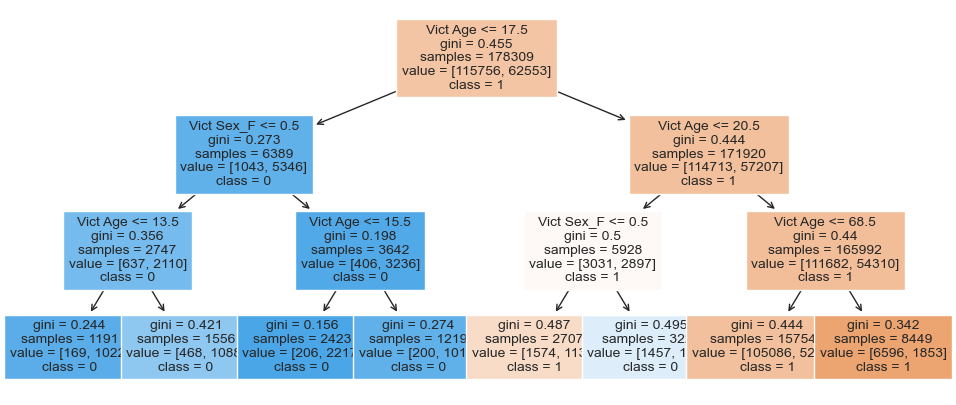

In [61]:
# Plotting the tree
plt.figure(figsize=(12,5)) 
tree.plot_tree(dt, feature_names = list(X.columns), class_names = [str(s) for s in Y.unique()], filled = True, fontsize = 10)


### Interpretation of Decision Tree:
Males between age 17.5 years and 20.5 years are prone to Severe Crimes\
People with age above 20.5 years are targeted with Severe crimes \
People with age less than 17.5 years are targeted with less Severe crimes


### Predicting the severity of the crime based on victim's demographics

In [62]:
# Importing Random Forest Library
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

from sklearn.model_selection import KFold

import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc

### Train and Test split of the Data
<ol>
<li>Training data on 2019, 2021, 2022 data and testing on 2020</li>
<li>creating train and test split of dependent and independent variables</li>
</ol>

In [63]:
# training data on 2019, 2021, 2022 data and testing on 2020
train_set = dataRF[dataRF['OCC Year'].isin([2019, 2021, 2022])]
test_set = dataRF[dataRF['OCC Year'] == 2022]

In [64]:
#creating dependent and independent variables separately in train and test split
X_train = train_set.drop(columns=['Severe', 'OCC Year'])
Y_train = train_set.Severe
X_test = test_set.drop(columns=['Severe', 'OCC Year'])
Y_test = test_set.Severe

### Fitting the model on train set

In [65]:
# Fitting the model on training data
cl = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = 3)
cl.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, random_state=0)

### Apply predictions on the test set

In [66]:
# Predicting test dataset values
y_pred = cl.predict(X_test)
# checking the predicted values with the actual values
(y_pred == Y_test).mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 408784    False
408786    False
408787     True
408788     True
408790     True
          ...  
643041    False
643042     True
643043     True
643046     True
643047    False
Name: Severe, Length: 178309, dtype: bool>

### Metrics for evaluating model
<ol>
<li>Confusion Matrix</li>
<li>Accuracy</li>
<li>Precision : Out of the retrieved elements, how many are actually positive?</li>
<li>Recall : Among the relevant elements, how many did I retrieve?</li>
</ol>

<Figure size 400x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(17.25, 0.5, 'True Label')

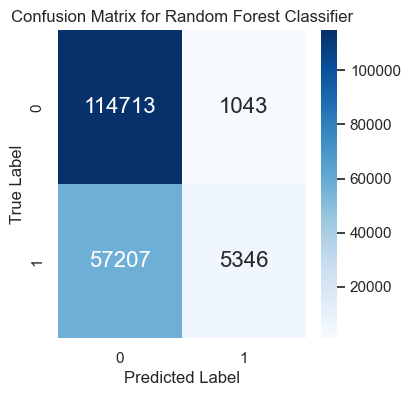

Accuracy of the model:  67.33
Precision of the model:  83.68
Recall of the model:  8.55


In [67]:
# Checking true positive, true negative, false posilives and false negatives
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating accuracy score
print("Accuracy of the model: ",round(met.accuracy_score(Y_test, y_pred) * 100, 2) )

# Calculating precision

print("Precision of the model: ", round(met.precision_score(Y_test, y_pred) * 100, 2))

# Calculating Recall
print("Recall of the model: ", round(met.recall_score(Y_test, y_pred) * 100, 2))

### ROC (Receiving Operator Characteristic) Curve

<Figure size 800x800 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

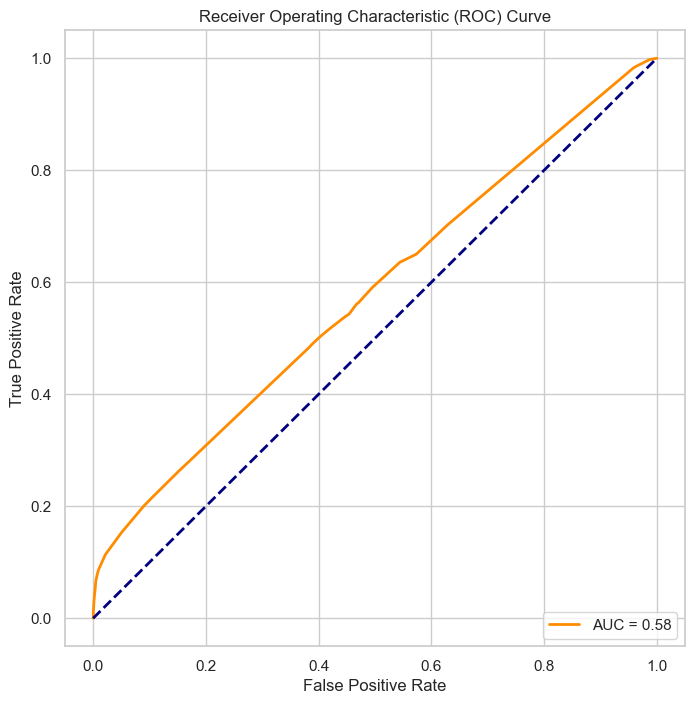

In [68]:
# Predict probabilities for the positive class (class 1)
y_prob = cl.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Cross Validations for 10 folds

In [69]:
# Cross validations with 10 folds
nfolds = 10
kf = KFold(n_splits = nfolds, shuffle = True, random_state = 0)

#Calculating the AUC - ROC scores of all folds
scores = sk.model_selection.cross_val_score(cl, X, Y, \
                                            cv = kf, n_jobs = -1, scoring = 'roc_auc')

# Mean of all 10 folds scores
scores.mean()

0.5763932812220973

## Recommendation based on Findings above

**Managerial Insight 1**:
To address the prevalence of high-frequency crime categories in specific areas, the LA Police Department should strategically deploy specialized units with enhanced vigilance during peak days and times. Alternatively, allocating resources to personnel with advanced training can effectively target the reduction of these frequently occurring crimes. 

**Managerial Insight 2**:
Implementing a community outreach initiative by appointing ambassadors will play a crucial role in raising awareness about crime occurrences. These ambassadors can educate residents on proactive measures to safeguard themselves. 

**Managerial Insight 3**:
Additionally, running targeted campaigns through various mediums, such as advertisements and billboards, will further inform vulnerable resident types about specific crimes and effective prevention strategies. 

This multifaceted approach ensures a comprehensive and community-centric effort to address and mitigate crime challenges.
